In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

plt.style.use('seaborn')

In [2]:
deliveries = pd.read_csv('ipl_ball_by_ball_data.csv')

In [3]:
df = deliveries.copy()

In [4]:
df["batting_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
df["bowling_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

In [5]:
df["batting_team"].replace({"Kings XI Punjab": "Punjab Kings"}, inplace=True)
df["bowling_team"].replace({"Kings XI Punjab": "Punjab Kings"}, inplace=True)

In [6]:
df1 = df[df['venue'].isin(['Dubai International Cricket Stadium','Sharjah Cricket Stadium','Sheikh Zayed Stadium'])]

In [7]:
def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [8]:
df1['isBowlerWk'] = df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['wicket_type']), axis = 1)

def Phases(ball):
    if ball < 5.6:
        return 'Powerplay'
    elif ball < 15.6:
        return 'Middle'
    else:
        return 'death'
        

df1['Phases'] = df.apply(lambda x:Phases(x['ball']), axis = 1)

In [9]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200658,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200659,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.2,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200660,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.1,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200661,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,8.4,Sunrisers Hyderabad,Rajasthan Royals,KS Williamson,V Shankar,C Sakariya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def Strike_rate(Runs, Balls):
    return Runs/Balls
    
def Runs_per_innings(Runs,Innings):
    return Runs/Innings

def Balls_per_boundary(Balls, boundaries):
    if boundaries>0:
        return Balls/boundaries
    else:
        return Balls/1
    
def Balls_per_dismissal(Balls, Dismissals):
    if Dismissals>0:
        return Balls/Dismissals
    else:
        return Balls/1

def Boundary_percent(Fours, Sixes, Balls):
    return (Fours+Sixes)/Balls
    
def Dot_percent(Dots, Balls):
    return 100*Dots/Balls

def Average(Runs, Dismissals):
    if Dismissals <1:
        return Runs/1
    else:
        return Runs/Dismissals
    
def Strike_rotation_percent(Ones,Threes,Balls):
    return 100*(Ones + Threes)/Balls

def Balls_per_innings(Balls, Innings):
    return Balls/Innings

# Batting Analysis

In [11]:
def BatsmanStats(df, Venue):
    df = df[df.venue == Venue]
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)
    
    runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns = {'runs_off_bat':'Runs'})
    balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns = {'match_id':'Balls'})
    dismissals = df.groupby(['striker'])['isBowlerWk'].sum().reset_index().rename(columns = {'isBowlerWk':'Dismissals'})
    matches = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "Innings"})


    dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns = {'isDot':'Dots'})
    ones = df.groupby(['striker'])['isOne'].sum().reset_index().rename(columns = {'isOne':'Ones'})
    twos = df.groupby(['striker'])['isTwo'].sum().reset_index().rename(columns = {'isTwo':'Twos'})
    threes = df.groupby(['striker'])['isThree'].sum().reset_index().rename(columns = {'isThree':'Threes'})
    fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
    sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
            
    df = pd.merge(matches,runs, on= 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on ='striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')
    
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['Balls'], x['Fours'] + x['Sixes']), axis = 1)
    df['Dot_percent'] = df.apply(lambda x: Dot_percent(x['Dots'], x['Balls']), axis = 1)
    df['Strike_rate'] = df.apply(lambda x: 100*Strike_rate(x['Runs'], x['Balls']), axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)
    df['Boundary_percent'] = df.apply(lambda x: 100*Boundary_percent(x['Fours'], x['Sixes'], x['Balls']), axis = 1)
    df['Average'] = df.apply(lambda x: Average(x['Runs'], x['Dismissals']), axis = 1)
    df['Strike_rotation_percent'] = df.apply(lambda x: Strike_rotation_percent(x['Ones'],x['Threes'], x['Balls']), axis = 1)
    df['Balls_per_innings'] = df.apply(lambda x: Balls_per_innings(x['Balls'], x['Innings']), axis = 1)
    df['RPI'] = df.apply(lambda x: Runs_per_innings(x['Runs'], x['Innings']),axis = 1)
    return df

In [12]:
Dubai_batting = BatsmanStats(df1, 'Dubai International Cricket Stadium' ).sort_values(by = 'Runs', ascending = False)

Sheikh_Zayed_batting = BatsmanStats(df1, 'Sheikh Zayed Stadium').sort_values(by = 'Runs', ascending = False)

Sharjah_batting = BatsmanStats(df1, 'Sharjah Cricket Stadium' ).sort_values(by = 'Runs', ascending = False)

In [13]:
Dubai_batting

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
68,KL Rahul,8,398,294,9,101,116,27,0,36,14,5.880000,34.353741,135.374150,32.666667,17.006803,44.222222,39.455782,36.750000,49.750000
27,DA Warner,10,371,286,8,104,107,31,2,28,14,6.809524,36.363636,129.720280,35.750000,14.685315,46.375000,38.111888,28.600000,37.100000
80,MK Pandey,9,312,267,6,111,101,17,1,24,13,7.216216,41.573034,116.853933,44.500000,13.857678,52.000000,38.202247,29.666667,34.666667
2,AB de Villiers,9,305,208,5,66,86,16,1,25,14,5.333333,31.730769,146.634615,41.600000,18.750000,61.000000,41.826923,23.111111,33.888889
120,S Dhawan,11,284,199,9,66,78,13,2,33,7,4.975000,33.165829,142.713568,22.111111,20.100503,31.555556,40.201005,18.090909,25.818182
47,Ishan Kishan,5,266,164,2,43,76,11,0,18,16,4.823529,26.219512,162.195122,82.000000,20.731707,133.000000,46.341463,32.800000,53.200000
146,V Kohli,9,253,213,8,61,104,29,1,10,8,11.833333,28.638498,118.779343,26.625000,8.450704,31.625000,49.295775,23.666667,28.111111
135,SS Iyer,9,252,227,8,83,103,16,1,15,9,9.458333,36.563877,111.013216,28.375000,10.572687,31.500000,45.814978,25.222222,28.000000
4,AJ Finch,9,249,205,8,97,57,14,2,26,9,5.857143,47.317073,121.463415,25.625000,17.073171,31.125000,28.780488,22.777778,27.666667
11,AT Rayudu,8,239,200,8,64,97,12,0,22,5,7.407407,32.000000,119.500000,25.000000,13.500000,29.875000,48.500000,25.000000,29.875000


In [14]:
Sheikh_Zayed_batting

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
120,SA Yadav,11,413,262,6,75,105,19,2,51,10,4.295082,28.625954,157.633588,43.666667,23.282443,68.833333,40.839695,23.818182,37.545455
115,S Dhawan,6,279,219,5,62,107,19,0,26,5,7.064516,28.310502,127.397260,43.800000,14.155251,55.800000,48.858447,36.500000,46.500000
110,RG Sharma,7,264,212,7,93,71,13,1,20,14,6.235294,43.867925,124.528302,30.285714,16.037736,37.714286,33.962264,30.285714,37.714286
6,AM Rahane,6,229,199,6,79,68,25,1,24,2,7.653846,39.698492,115.075377,33.166667,13.065327,38.166667,34.673367,33.166667,38.166667
25,D Padikkal,5,213,158,4,51,64,12,3,26,2,5.642857,32.278481,134.810127,39.500000,17.721519,53.250000,42.405063,31.600000,42.600000
137,Shubman Gill,8,212,212,6,90,82,17,0,21,2,9.217391,42.452830,100.000000,35.333333,10.849057,35.333333,38.679245,26.500000,26.500000
98,Q de Kock,8,212,149,7,58,48,13,0,21,9,4.966667,38.926174,142.281879,21.285714,20.134228,30.285714,32.214765,18.625000,26.500000
32,EJG Morgan,8,210,182,6,78,68,10,0,17,9,7.000000,42.857143,115.384615,30.333333,14.285714,35.000000,37.362637,22.750000,26.250000
78,MK Pandey,8,204,169,8,65,66,14,0,17,7,7.041667,38.461538,120.710059,21.125000,14.201183,25.500000,39.053254,21.125000,25.500000
11,AT Rayudu,5,192,167,4,57,74,16,0,17,3,8.350000,34.131737,114.970060,41.750000,11.976048,48.000000,44.311377,33.400000,38.400000


In [15]:
Sharjah_batting

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
114,SV Samson,4,216,119,4,38,44,7,2,8,20,4.250000,31.932773,181.512605,29.750000,23.529412,54.000000,38.655462,29.750000,54.000000
58,KL Rahul,5,210,186,4,64,94,6,0,14,8,8.454545,34.408602,112.903226,46.500000,11.827957,52.500000,50.537634,37.200000,42.000000
34,GJ Maxwell,3,197,101,2,30,35,6,0,15,15,3.366667,29.702970,195.049505,50.500000,29.702970,98.500000,34.653465,33.666667,65.666667
109,SPD Smith,4,170,115,3,39,46,5,0,18,7,4.600000,33.913043,147.826087,38.333333,21.739130,56.666667,40.000000,28.750000,42.500000
120,V Kohli,5,168,139,3,35,73,17,1,10,3,10.692308,25.179856,120.863309,46.333333,9.352518,56.000000,53.237410,27.800000,33.600000
24,DA Warner,5,161,129,4,49,47,13,0,16,4,6.450000,37.984496,124.806202,32.250000,15.503876,40.250000,36.434109,25.800000,32.200000
69,MA Agarwal,3,157,91,3,33,28,5,1,14,10,3.791667,36.263736,172.527473,30.333333,26.373626,52.333333,31.868132,30.333333,52.333333
88,Q de Kock,4,154,114,3,47,39,6,1,13,8,5.428571,41.228070,135.087719,38.000000,18.421053,51.333333,35.087719,28.500000,38.500000
100,S Dhawan,5,140,94,4,29,38,6,0,18,3,4.476190,30.851064,148.936170,23.500000,22.340426,35.000000,40.425532,18.800000,28.000000
111,SS Iyer,3,133,80,1,22,35,4,0,12,7,4.210526,27.500000,166.250000,80.000000,23.750000,133.000000,43.750000,26.666667,44.333333


In [16]:
Sharjah_batting[Sharjah_batting.striker == 'SA Yadav']

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
103,SA Yadav,3,87,66,2,26,21,6,0,12,1,5.076923,39.393939,131.818182,33.0,19.69697,43.5,31.818182,22.0,29.0


In [17]:
Dubai_batting[Dubai_batting.striker == 'SA Yadav']

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
124,SA Yadav,6,90,78,3,36,26,3,0,10,3,6.0,46.153846,115.384615,26.0,16.666667,30.0,33.333333,13.0,15.0


In [18]:
Sheikh_Zayed_batting[Sheikh_Zayed_batting.striker == 'SA Yadav']

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Average,Strike_rotation_percent,Balls_per_innings,RPI
120,SA Yadav,11,413,262,6,75,105,19,2,51,10,4.295082,28.625954,157.633588,43.666667,23.282443,68.833333,40.839695,23.818182,37.545455


## Death overs batting analysis


In [19]:
def Batsman_Stats(df, Phase, Venue):
    df = df[df.Phases == Phase]
    df = df[df.venue == Venue]
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)
    
    runs = df.groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns = {'runs_off_bat':'Runs'})
    balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns = {'match_id':'Balls'})
    dismissals = df.groupby(['striker'])['isBowlerWk'].sum().reset_index().rename(columns = {'isBowlerWk':'Dismissals'})
    matches = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "Innings"})


    dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns = {'isDot':'Dots'})
    ones = df.groupby(['striker'])['isOne'].sum().reset_index().rename(columns = {'isOne':'Ones'})
    twos = df.groupby(['striker'])['isTwo'].sum().reset_index().rename(columns = {'isTwo':'Twos'})
    threes = df.groupby(['striker'])['isThree'].sum().reset_index().rename(columns = {'isThree':'Threes'})
    fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
    sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
            
    df = pd.merge(matches,runs, on= 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on ='striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')
    
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['Balls'], x['Fours'] + x['Sixes']), axis = 1)
    df['Dot_percent'] = df.apply(lambda x: Dot_percent(x['Dots'], x['Balls']), axis = 1)
    df['Strike_rate'] = df.apply(lambda x: 100*Strike_rate(x['Runs'], x['Balls']), axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)
    df['Boundary_percent'] = df.apply(lambda x: 100*Boundary_percent(x['Fours'], x['Sixes'], x['Balls']), axis = 1)
    df['Strike_rotation_percent'] = df.apply(lambda x: Strike_rotation_percent(x['Ones'],x['Threes'], x['Balls']), axis = 1)
    df['Balls_per_innings'] = df.apply(lambda x: Balls_per_innings(x['Balls'], x['Innings']), axis = 1)
    df['RPI'] = df.apply(lambda x: Runs_per_innings(x['Runs'], x['Innings']),axis = 1)
    df['Average'] = df.apply(lambda x: Average(x['Runs'], x['Dismissals']), axis = 1)
    return df

In [20]:
SZ_Stadium = Batsman_Stats(df1, 'death', 'Sheikh Zayed Stadium').sort_values(by = 'Runs', ascending = False)

In [21]:
Dubai_Stadium = Batsman_Stats(df1, 'death', 'Dubai International Cricket Stadium').sort_values(by = 'Runs', ascending = False)
Dubai_Stadium

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
44,KA Pollard,5,132,52,3,8,19,5,1,7,12,2.736842,15.384615,253.846154,17.333333,36.538462,38.461538,10.400000,26.400000,44.000000
81,RA Jadeja,6,123,68,3,17,23,11,0,12,5,4.000000,25.000000,180.882353,22.666667,25.000000,33.823529,11.333333,20.500000,41.000000
2,AB de Villiers,5,122,49,1,9,18,3,0,8,11,2.578947,18.367347,248.979592,49.000000,38.775510,36.734694,9.800000,24.400000,122.000000
60,MP Stoinis,5,80,45,2,12,18,2,0,10,3,3.461538,26.666667,177.777778,22.500000,28.888889,40.000000,9.000000,16.000000,40.000000
50,KL Rahul,4,80,35,3,6,12,6,0,5,6,3.181818,17.142857,228.571429,11.666667,31.428571,34.285714,8.750000,20.000000,26.666667
62,MS Dhoni,6,79,56,3,22,18,4,1,8,3,5.090909,39.285714,141.071429,18.666667,19.642857,33.928571,9.333333,13.166667,26.333333
80,R Tewatia,4,69,41,0,9,19,4,0,6,3,4.555556,21.951220,168.292683,41.000000,21.951220,46.341463,10.250000,17.250000,69.000000
26,EJG Morgan,3,68,38,1,13,12,3,0,5,5,3.800000,34.210526,178.947368,38.000000,26.315789,31.578947,12.666667,22.666667,68.000000
108,V Kohli,2,65,34,1,5,13,10,0,2,4,5.666667,14.705882,191.176471,34.000000,17.647059,38.235294,17.000000,32.500000,65.000000
35,Ishan Kishan,3,62,25,1,3,12,1,0,3,6,2.777778,12.000000,248.000000,25.000000,36.000000,48.000000,8.333333,20.666667,62.000000


In [22]:
Sharjah_stadium = Batsman_Stats(df1, 'death', 'Sharjah Cricket Stadium' ).sort_values(by = 'Runs', ascending = False)
Sharjah_stadium

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
36,KA Pollard,3,76,35,1,10,14,0,0,2,9,3.181818,28.571429,217.142857,35.000000,31.428571,40.000000,11.666667,25.333333,76.000000
58,R Tewatia,3,67,31,3,12,7,2,0,2,8,3.100000,38.709677,216.129032,10.333333,32.258065,22.580645,10.333333,22.333333,22.333333
1,AB de Villiers,3,64,37,2,12,12,4,0,5,4,4.111111,32.432432,172.972973,18.500000,24.324324,32.432432,12.333333,21.333333,32.000000
31,JC Archer,2,40,12,0,2,4,0,0,0,6,2.000000,16.666667,333.333333,12.000000,50.000000,33.333333,6.000000,20.000000,40.000000
60,RA Jadeja,3,40,25,1,7,12,2,0,0,4,6.250000,28.000000,160.000000,25.000000,16.000000,48.000000,8.333333,13.333333,40.000000
14,DA Miller,1,39,12,0,2,1,4,0,0,5,2.400000,16.666667,325.000000,12.000000,41.666667,8.333333,12.000000,39.000000,39.000000
3,AR Patel,2,38,15,1,4,4,1,0,2,4,2.500000,26.666667,253.333333,15.000000,40.000000,26.666667,7.500000,19.000000,38.000000
20,F du Plessis,1,36,12,1,2,4,1,0,0,5,2.400000,16.666667,300.000000,12.000000,41.666667,33.333333,12.000000,36.000000,36.000000
61,RA Tripathi,2,36,17,2,8,2,0,0,4,3,2.428571,47.058824,211.764706,8.500000,41.176471,11.764706,8.500000,18.000000,18.000000
51,MS Dhoni,3,36,22,1,4,14,0,0,1,3,5.500000,18.181818,163.636364,22.000000,18.181818,63.636364,7.333333,12.000000,36.000000


In [23]:
### Some conditions to be prescribed

In [24]:
SZ_Stadium = SZ_Stadium[SZ_Stadium.Runs >= 40]
SZ_Stadium = SZ_Stadium[SZ_Stadium.Innings >= 2]

In [25]:
SZ_Stadium

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
30,HH Pandya,6,146,69,2,18,24,5,0,10,12,3.136364,26.086957,211.594203,34.500000,31.884058,34.782609,11.500000,24.333333,73.000000
93,SA Yadav,5,93,43,2,9,15,3,0,12,4,2.687500,20.930233,216.279070,21.500000,37.209302,34.883721,8.600000,18.600000,46.500000
25,EJG Morgan,4,86,39,2,6,14,7,0,7,5,3.250000,15.384615,220.512821,19.500000,30.769231,35.897436,9.750000,21.500000,43.000000
72,PJ Cummins,4,77,43,1,15,13,4,0,5,6,3.909091,34.883721,179.069767,43.000000,25.581395,30.232558,10.750000,19.250000,77.000000
45,KA Pollard,6,76,52,1,19,16,7,0,7,3,5.200000,36.538462,146.153846,52.000000,19.230769,30.769231,8.666667,12.666667,76.000000
46,KD Karthik,3,70,37,1,11,12,2,0,9,3,3.083333,29.729730,189.189189,37.000000,32.432432,32.432432,12.333333,23.333333,70.000000
62,MS Dhoni,5,67,34,3,8,11,5,0,7,3,3.400000,23.529412,197.058824,11.333333,29.411765,32.352941,6.800000,13.400000,22.333333
81,RA Jadeja,4,54,28,2,5,14,0,0,7,2,3.111111,17.857143,192.857143,14.000000,32.142857,50.000000,7.000000,13.500000,27.000000
51,KS Williamson,3,44,27,2,5,14,2,0,5,1,4.500000,18.518519,162.962963,13.500000,22.222222,51.851852,9.000000,14.666667,22.000000
100,SPD Smith,3,42,24,0,4,10,4,0,6,0,4.000000,16.666667,175.000000,24.000000,25.000000,41.666667,8.000000,14.000000,42.000000


In [26]:
Dubai_Stadium = Dubai_Stadium[Dubai_Stadium.Runs >= 40]
Dubai_Stadium = Dubai_Stadium[Dubai_Stadium.Innings >= 2]

In [27]:
Dubai_Stadium

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
44,KA Pollard,5,132,52,3,8,19,5,1,7,12,2.736842,15.384615,253.846154,17.333333,36.538462,38.461538,10.400000,26.400000,44.000000
81,RA Jadeja,6,123,68,3,17,23,11,0,12,5,4.000000,25.000000,180.882353,22.666667,25.000000,33.823529,11.333333,20.500000,41.000000
2,AB de Villiers,5,122,49,1,9,18,3,0,8,11,2.578947,18.367347,248.979592,49.000000,38.775510,36.734694,9.800000,24.400000,122.000000
60,MP Stoinis,5,80,45,2,12,18,2,0,10,3,3.461538,26.666667,177.777778,22.500000,28.888889,40.000000,9.000000,16.000000,40.000000
50,KL Rahul,4,80,35,3,6,12,6,0,5,6,3.181818,17.142857,228.571429,11.666667,31.428571,34.285714,8.750000,20.000000,26.666667
62,MS Dhoni,6,79,56,3,22,18,4,1,8,3,5.090909,39.285714,141.071429,18.666667,19.642857,33.928571,9.333333,13.166667,26.333333
80,R Tewatia,4,69,41,0,9,19,4,0,6,3,4.555556,21.951220,168.292683,41.000000,21.951220,46.341463,10.250000,17.250000,69.000000
26,EJG Morgan,3,68,38,1,13,12,3,0,5,5,3.800000,34.210526,178.947368,38.000000,26.315789,31.578947,12.666667,22.666667,68.000000
108,V Kohli,2,65,34,1,5,13,10,0,2,4,5.666667,14.705882,191.176471,34.000000,17.647059,38.235294,17.000000,32.500000,65.000000
35,Ishan Kishan,3,62,25,1,3,12,1,0,3,6,2.777778,12.000000,248.000000,25.000000,36.000000,48.000000,8.333333,20.666667,62.000000


In [28]:

Sharjah_stadium = Sharjah_stadium[Sharjah_stadium.Runs >= 35]
Sharjah_stadium = Sharjah_stadium[Sharjah_stadium.Innings >= 2]

In [29]:
Sharjah_stadium

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
36,KA Pollard,3,76,35,1,10,14,0,0,2,9,3.181818,28.571429,217.142857,35.000000,31.428571,40.000000,11.666667,25.333333,76.000000
58,R Tewatia,3,67,31,3,12,7,2,0,2,8,3.100000,38.709677,216.129032,10.333333,32.258065,22.580645,10.333333,22.333333,22.333333
1,AB de Villiers,3,64,37,2,12,12,4,0,5,4,4.111111,32.432432,172.972973,18.500000,24.324324,32.432432,12.333333,21.333333,32.000000
31,JC Archer,2,40,12,0,2,4,0,0,0,6,2.000000,16.666667,333.333333,12.000000,50.000000,33.333333,6.000000,20.000000,40.000000
60,RA Jadeja,3,40,25,1,7,12,2,0,0,4,6.250000,28.000000,160.000000,25.000000,16.000000,48.000000,8.333333,13.333333,40.000000
3,AR Patel,2,38,15,1,4,4,1,0,2,4,2.500000,26.666667,253.333333,15.000000,40.000000,26.666667,7.500000,19.000000,38.000000
61,RA Tripathi,2,36,17,2,8,2,0,0,4,3,2.428571,47.058824,211.764706,8.500000,41.176471,11.764706,8.500000,18.000000,18.000000
51,MS Dhoni,3,36,22,1,4,14,0,0,1,3,5.500000,18.181818,163.636364,22.000000,18.181818,63.636364,7.333333,12.000000,36.000000
22,GJ Maxwell,2,35,22,1,7,9,1,0,3,2,4.400000,31.818182,159.090909,22.000000,22.727273,40.909091,11.000000,17.500000,35.000000


In [30]:
SZ_Stadium = SZ_Stadium.reset_index()

In [31]:
Dubai_Stadium = Dubai_Stadium.reset_index()

In [32]:
Sharjah_stadium = Sharjah_stadium.reset_index()

### Visualization 

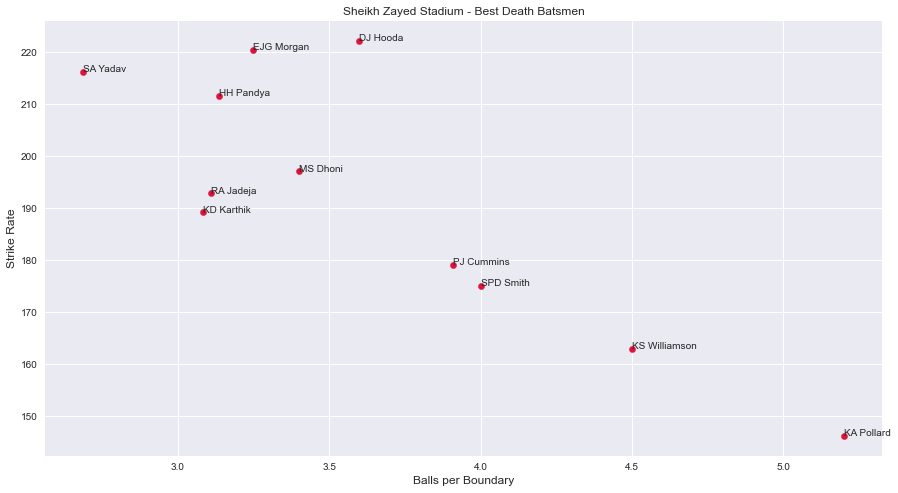

In [33]:
plt.figure(figsize = (15,8))
plt.scatter(SZ_Stadium['BPB'], SZ_Stadium['Strike_rate'], c= 'crimson', s = 40)

for i in range(len(SZ_Stadium)):
    plt.text(SZ_Stadium['BPB'][i], SZ_Stadium['Strike_rate'][i], SZ_Stadium['striker'][i])


plt.xlabel('Balls per Boundary', fontsize = 12)
plt.ylabel('Strike Rate', fontsize = 12)
plt.title('Sheikh Zayed Stadium - Best Death Batsmen')

plt.show()


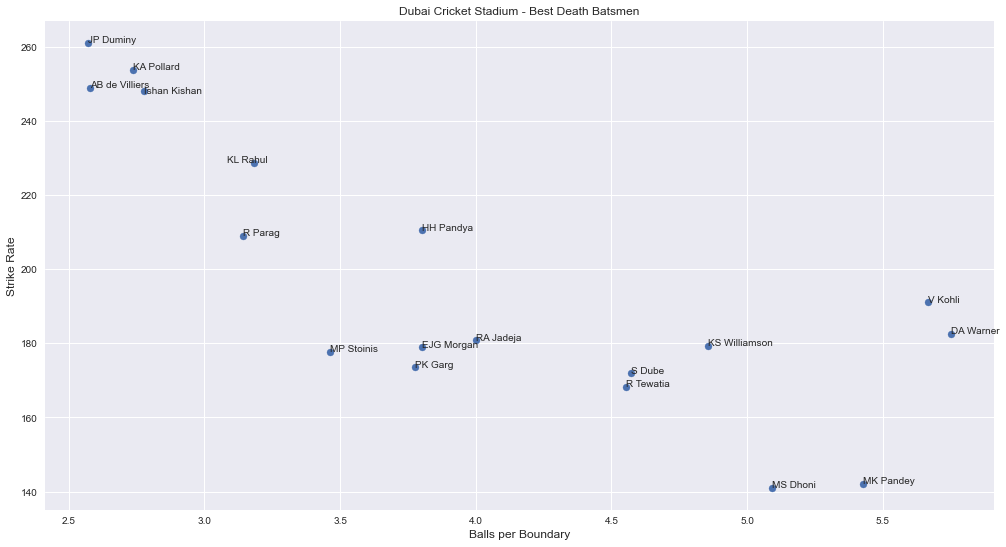

In [34]:
plt.figure(figsize = (17,9))
plt.scatter(Dubai_Stadium['BPB'], Dubai_Stadium['Strike_rate'])

for i in range(len(Dubai_Stadium)):
    if Dubai_Stadium['striker'][i] == 'KL Rahul':
        plt.text(Dubai_Stadium['BPB'][i] - 0.1, Dubai_Stadium['Strike_rate'][i] + 0.2, Dubai_Stadium['striker'][i])
    elif Dubai_Stadium['striker'][i] == 'Ishan Kishan':
        plt.text(Dubai_Stadium['BPB'][i], Dubai_Stadium['Strike_rate'][i] - 0.5, Dubai_Stadium['striker'][i])
    else:
        plt.text(Dubai_Stadium['BPB'][i], Dubai_Stadium['Strike_rate'][i], Dubai_Stadium['striker'][i])


plt.xlabel('Balls per Boundary', fontsize = 12)
plt.ylabel('Strike Rate', fontsize = 12)
plt.title('Dubai Cricket Stadium - Best Death Batsmen')


plt.show()


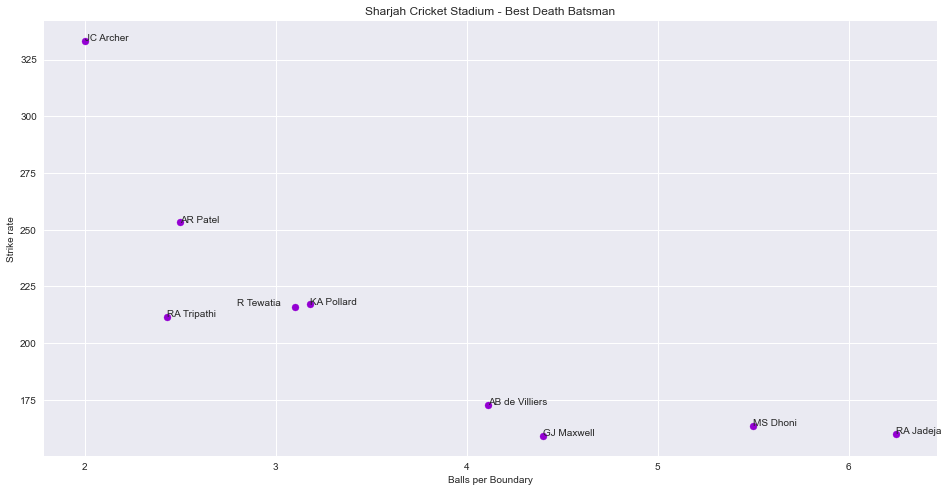

In [35]:
plt.figure(figsize = (16,8))
plt.scatter(Sharjah_stadium['BPB'], Sharjah_stadium['Strike_rate'], c = 'darkviolet')

for i in range(len(Sharjah_stadium)):
    if Sharjah_stadium['striker'][i] == 'R Tewatia':
        plt.text(Sharjah_stadium['BPB'][i] - 0.3, Sharjah_stadium['Strike_rate'][i] + 0.2, Sharjah_stadium['striker'][i])
    else:
        plt.text(Sharjah_stadium['BPB'][i], Sharjah_stadium['Strike_rate'][i], Sharjah_stadium['striker'][i])



plt.xlabel('Balls per Boundary', fontsize = 10)
plt.ylabel('Strike rate', fontsize = 10)
plt.title('Sharjah Cricket Stadium - Best Death Batsman')


plt.show()

## Middle overs batting analysis

In [36]:

SZ_Middle = Batsman_Stats(df1, 'Middle', 'Sheikh Zayed Stadium').sort_values(by = 'Runs', ascending = False)

Dubai_Middle = Batsman_Stats(df1, 'Middle', 'Dubai International Cricket Stadium').sort_values(by = 'Runs', ascending = False)

Sharjah_Middle = Batsman_Stats(df1, 'Middle', 'Sharjah Cricket Stadium').sort_values(by = 'Runs', ascending = False)

In [37]:
SZ_Middle = SZ_Middle[SZ_Middle.Runs >= 85]
SZ_Middle = SZ_Middle[SZ_Middle.Innings >= 2]
SZ_Middle = SZ_Middle.reset_index()
SZ_Middle

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,79,SA Yadav,9,255,180,4,52,79,14,2,28,5,5.454545,28.888889,141.666667,45.000000,18.333333,45.000000,20.000000,28.333333,63.750000
1,8,AT Rayudu,5,150,129,2,40,60,16,0,10,3,9.923077,31.007752,116.279070,64.500000,10.077519,46.511628,25.800000,30.000000,75.000000
2,72,RG Sharma,5,147,105,3,34,45,10,0,7,9,6.562500,32.380952,140.000000,35.000000,15.238095,42.857143,21.000000,29.400000,49.000000
3,75,S Dhawan,5,143,115,3,25,65,14,0,8,3,10.454545,21.739130,124.347826,38.333333,9.565217,56.521739,23.000000,28.600000,47.666667
4,31,JC Buttler,3,119,76,1,25,23,14,0,8,6,5.428571,32.894737,156.578947,76.000000,18.421053,30.263158,25.333333,39.666667,119.000000
5,5,AM Rahane,3,117,91,0,23,43,15,0,8,2,9.100000,25.274725,128.571429,91.000000,10.989011,47.252747,30.333333,39.000000,117.000000
6,21,EJG Morgan,7,117,123,4,56,51,3,0,9,4,9.461538,45.528455,95.121951,30.750000,10.569106,41.463415,17.571429,16.714286,29.250000
7,45,KS Williamson,4,113,88,1,26,46,3,1,7,5,7.333333,29.545455,128.409091,88.000000,13.636364,53.409091,22.000000,28.250000,113.000000
8,90,SV Samson,3,108,60,1,15,26,3,0,10,6,3.750000,25.000000,180.000000,60.000000,26.666667,43.333333,20.000000,36.000000,108.000000
9,15,D Padikkal,4,107,86,2,25,42,6,1,11,1,7.166667,29.069767,124.418605,43.000000,13.953488,50.000000,21.500000,26.750000,53.500000


In [38]:
Dubai_Middle = Dubai_Middle[Dubai_Middle.Runs >= 85]
Dubai_Middle = Dubai_Middle[Dubai_Middle.Innings >= 2]
Dubai_Middle = Dubai_Middle.reset_index()
Dubai_Middle

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,6,AT Rayudu,6,200,160,4,47,82,8,0,18,5,6.956522,29.375000,125.000000,40.00,14.375000,51.250000,26.666667,33.333333,50.000000
1,60,N Pooran,6,184,106,4,33,40,7,0,13,13,4.076923,31.132075,173.584906,26.50,24.528302,37.735849,17.666667,30.666667,46.000000
2,79,RR Pant,8,183,168,5,59,81,8,0,17,3,8.400000,35.119048,108.928571,33.60,11.904762,48.214286,21.000000,22.875000,36.600000
3,16,DA Warner,7,182,145,5,45,66,17,0,10,7,8.529412,31.034483,125.517241,29.00,11.724138,45.517241,20.714286,26.000000,36.400000
4,28,Ishan Kishan,4,161,99,0,20,51,10,0,9,9,5.500000,20.202020,162.626263,99.00,18.181818,51.515152,24.750000,40.250000,161.000000
5,51,MK Pandey,8,160,147,3,51,75,6,1,7,7,10.500000,34.693878,108.843537,49.00,9.523810,51.700680,18.375000,20.000000,53.333333
6,93,SS Iyer,8,153,140,5,42,77,11,0,3,7,14.000000,30.000000,109.285714,28.00,7.142857,55.000000,17.500000,19.125000,30.600000
7,42,KL Rahul,6,153,126,2,36,65,9,0,13,3,7.875000,28.571429,121.428571,63.00,12.698413,51.587302,21.000000,25.500000,76.500000
8,101,V Kohli,6,141,136,4,40,72,17,1,2,4,22.666667,29.411765,103.676471,34.00,4.411765,53.676471,22.666667,23.500000,35.250000
9,0,AB de Villiers,8,134,123,3,39,61,11,1,9,2,11.181818,31.707317,108.943089,41.00,8.943089,50.406504,15.375000,16.750000,44.666667


In [39]:
Sharjah_Middle = Sharjah_Middle[Sharjah_Middle.Runs >= 70]
Sharjah_Middle = Sharjah_Middle[Sharjah_Middle.Innings >= 2]
Sharjah_Middle = Sharjah_Middle.reset_index()

In [40]:
Sharjah_Middle

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,79,SV Samson,4,144,78,2,19,37,4,1,3,14,4.588235,24.358974,184.615385,39.000000,21.794872,48.717949,19.500000,36.000000,72.000000
1,23,GJ Maxwell,2,142,68,1,19,22,5,0,11,11,3.090909,27.941176,208.823529,68.000000,32.352941,32.352941,34.000000,71.000000,142.000000
2,39,KL Rahul,5,120,100,3,27,60,2,0,5,6,9.090909,27.000000,120.000000,33.333333,11.000000,60.000000,20.000000,24.000000,40.000000
3,81,V Kohli,4,114,100,1,25,57,10,1,4,3,14.285714,25.000000,114.000000,100.000000,7.000000,58.000000,25.000000,28.500000,114.000000
4,16,DA Warner,2,98,70,1,18,32,10,0,7,3,7.000000,25.714286,140.000000,70.000000,14.285714,45.714286,35.000000,49.000000,98.000000
5,29,Ishan Kishan,3,90,63,1,16,36,2,0,2,7,7.000000,25.396825,142.857143,63.000000,14.285714,57.142857,21.000000,30.000000,90.000000
6,47,MA Agarwal,2,88,42,1,10,15,3,1,7,6,3.230769,23.809524,209.523810,42.000000,30.952381,38.095238,21.000000,44.000000,88.000000
7,59,Q de Kock,3,85,53,2,15,23,5,0,4,6,5.300000,28.301887,160.377358,26.500000,18.867925,43.396226,17.666667,28.333333,42.500000
8,75,SR Watson,3,77,48,3,18,14,3,1,9,3,4.000000,37.500000,160.416667,16.000000,25.000000,31.250000,16.000000,25.666667,25.666667
9,11,CH Gayle,2,74,52,0,21,20,2,0,2,7,5.777778,40.384615,142.307692,52.000000,17.307692,38.461538,26.000000,37.000000,74.000000


### Visualization

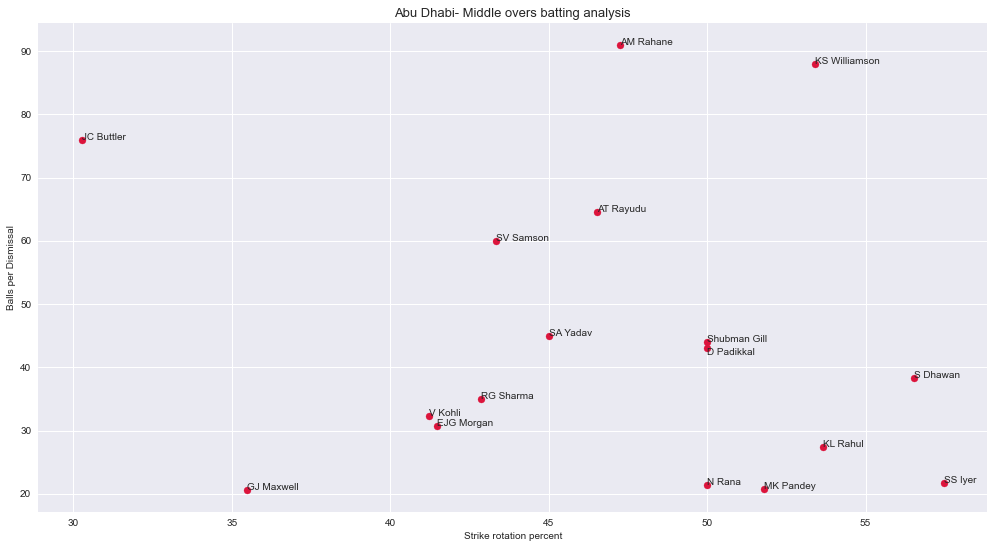

In [41]:
plt.figure(figsize = (17, 9))
plt.scatter(SZ_Middle['Strike_rotation_percent'], SZ_Middle['BPD'], c = 'Crimson')

for i in range(len(SZ_Middle['striker'])):
    if SZ_Middle['striker'][i] == 'D Padikkal':
        plt.text(SZ_Middle['Strike_rotation_percent'][i], SZ_Middle['BPD'][i] - 1, SZ_Middle['striker'][i])
    else:
        plt.text(SZ_Middle['Strike_rotation_percent'][i], SZ_Middle['BPD'][i], SZ_Middle['striker'][i])

plt.title('Abu Dhabi- Middle overs batting analysis', fontsize = 13)
plt.xlabel('Strike rotation percent', fontsize = 10)
plt.ylabel('Balls per Dismissal', fontsize = 10)
        

plt.show()

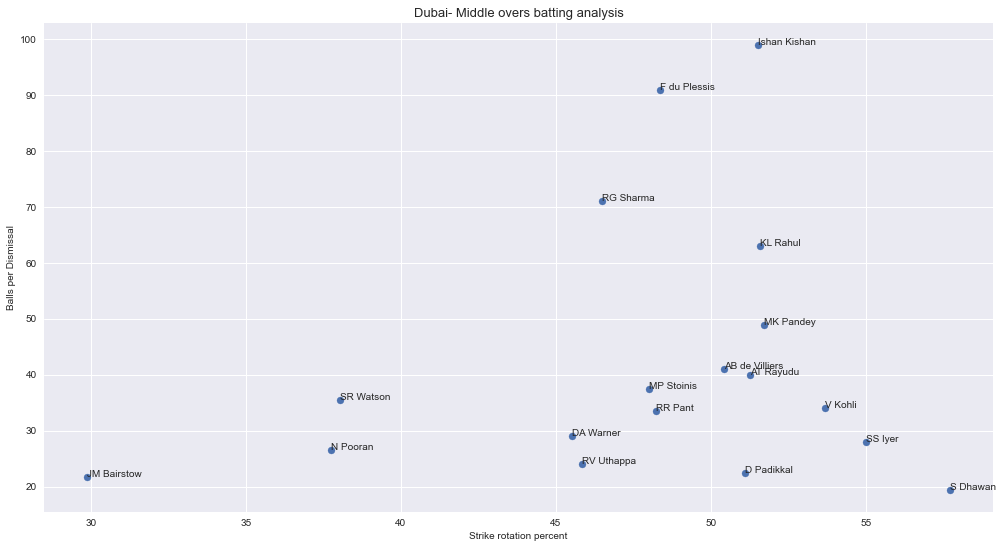

In [42]:
plt.figure(figsize = (17, 9))
plt.scatter(Dubai_Middle['Strike_rotation_percent'], Dubai_Middle['BPD'])

for i in range(len(Dubai_Middle['striker'])):
        plt.text(Dubai_Middle['Strike_rotation_percent'][i], Dubai_Middle['BPD'][i], Dubai_Middle['striker'][i])

plt.title('Dubai- Middle overs batting analysis', fontsize = 13)
plt.xlabel('Strike rotation percent', fontsize = 10)
plt.ylabel('Balls per Dismissal', fontsize = 10)
        

plt.show()

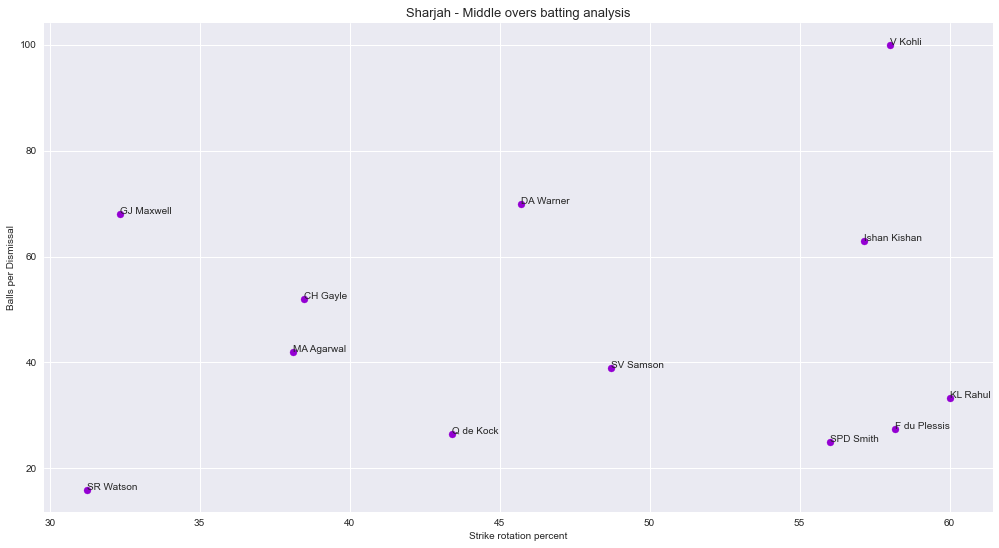

In [43]:
plt.figure(figsize = (17, 9))
plt.scatter(Sharjah_Middle['Strike_rotation_percent'], Sharjah_Middle['BPD'], c = 'darkviolet')

for i in range(len(Sharjah_Middle['striker'])):
        plt.text(Sharjah_Middle['Strike_rotation_percent'][i], Sharjah_Middle['BPD'][i], Sharjah_Middle['striker'][i])

plt.title('Sharjah - Middle overs batting analysis', fontsize = 13)
plt.xlabel('Strike rotation percent', fontsize = 10)
plt.ylabel('Balls per Dismissal', fontsize = 10)
        

plt.show()

## Powerplay analysis

In [44]:
SZ_Powerplay = Batsman_Stats(df1, 'Powerplay', 'Sheikh Zayed Stadium').sort_values(by = 'Runs', ascending = False)
SZ_Powerplay

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
47,Q de Kock,8,145,108,6,49,27,11,0,15,6,5.142857,45.370370,134.259259,18.000000,19.444444,25.000000,13.500000,18.125000,24.166667
53,S Dhawan,6,109,84,1,33,31,3,0,15,2,4.941176,39.285714,129.761905,84.000000,20.238095,36.904762,14.000000,18.166667,109.000000
50,RG Sharma,6,108,96,2,53,23,2,1,12,5,5.647059,55.208333,112.500000,48.000000,17.708333,25.000000,16.000000,18.000000,54.000000
13,D Padikkal,5,106,70,1,24,22,6,2,15,1,4.375000,34.285714,151.428571,70.000000,22.857143,34.285714,14.000000,21.200000,106.000000
66,Shubman Gill,8,105,113,4,62,31,4,0,15,1,7.062500,54.867257,92.920354,28.250000,14.159292,27.433628,14.125000,13.125000,26.250000
8,BA Stokes,3,95,51,2,21,8,4,0,14,3,3.000000,41.176471,186.274510,25.500000,33.333333,15.686275,17.000000,31.666667,47.500000
3,AM Rahane,6,93,90,3,51,16,7,1,15,0,6.000000,56.666667,103.333333,30.000000,16.666667,18.888889,15.000000,15.500000,31.000000
37,MK Pandey,6,88,74,2,36,20,6,0,8,4,6.166667,48.648649,118.918919,37.000000,16.216216,27.027027,12.333333,14.666667,44.000000
15,DA Warner,6,84,76,3,30,32,4,0,8,2,7.600000,39.473684,110.526316,25.333333,13.157895,42.105263,12.666667,14.000000,28.000000
31,KL Rahul,4,82,70,0,29,25,5,1,8,2,7.000000,41.428571,117.142857,70.000000,14.285714,37.142857,17.500000,20.500000,82.000000


In [45]:
Dubai_Powerplay = Batsman_Stats(df1, 'Powerplay', 'Dubai International Cricket Stadium').sort_values(by = 'Runs', ascending = False)

In [46]:
Sharjah_Powerplay = Batsman_Stats(df1, 'Powerplay', 'Sharjah Cricket Stadium').sort_values(by = 'Runs', ascending = False)
Sharjah_Powerplay

,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
24,KL Rahul,5,83,69,0,27,27,4,0,9,2,6.272727,39.130435,120.289855,69.0,15.942029,39.130435,13.800000,16.600000,83.000000
46,SPD Smith,3,69,47,0,22,11,2,0,9,3,3.916667,46.808511,146.808511,47.0,25.531915,23.404255,15.666667,23.000000,69.000000
36,Q de Kock,4,69,61,1,32,16,1,1,9,2,5.545455,52.459016,113.114754,61.0,18.032787,27.868852,15.250000,17.250000,69.000000
50,Shubman Gill,3,68,50,0,18,22,0,0,7,3,5.000000,36.000000,136.000000,50.0,20.000000,44.000000,16.666667,22.666667,68.000000
1,AJ Finch,4,66,59,1,28,20,2,0,6,3,6.555556,47.457627,111.864407,59.0,15.254237,33.898305,14.750000,16.500000,66.000000
26,MA Agarwal,3,64,46,1,22,12,2,0,6,4,4.600000,47.826087,139.130435,46.0,21.739130,26.086957,15.333333,21.333333,64.000000
49,SV Samson,3,63,35,0,16,6,2,1,5,5,3.500000,45.714286,180.000000,35.0,28.571429,20.000000,11.666667,21.000000,63.000000
42,S Dhawan,5,62,48,4,21,16,1,0,8,2,4.800000,43.750000,129.166667,12.0,20.833333,33.333333,9.600000,12.400000,15.500000
11,DA Warner,5,56,54,3,30,12,3,0,8,1,6.000000,55.555556,103.703704,18.0,16.666667,22.222222,10.800000,11.200000,18.666667
54,WP Saha,3,51,36,1,15,11,2,0,6,2,4.500000,41.666667,141.666667,36.0,22.222222,30.555556,12.000000,17.000000,51.000000


In [47]:
Sharjah_Powerplay = Sharjah_Powerplay[Sharjah_Powerplay.Runs >= 50]
Sharjah_Powerplay = Sharjah_Powerplay[Sharjah_Powerplay.Innings > 2]
Sharjah_Powerplay.reset_index(inplace = True)
Sharjah_Powerplay

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,24,KL Rahul,5,83,69,0,27,27,4,0,9,2,6.272727,39.130435,120.289855,69.0,15.942029,39.130435,13.800000,16.600000,83.000000
1,46,SPD Smith,3,69,47,0,22,11,2,0,9,3,3.916667,46.808511,146.808511,47.0,25.531915,23.404255,15.666667,23.000000,69.000000
2,36,Q de Kock,4,69,61,1,32,16,1,1,9,2,5.545455,52.459016,113.114754,61.0,18.032787,27.868852,15.250000,17.250000,69.000000
3,50,Shubman Gill,3,68,50,0,18,22,0,0,7,3,5.000000,36.000000,136.000000,50.0,20.000000,44.000000,16.666667,22.666667,68.000000
4,1,AJ Finch,4,66,59,1,28,20,2,0,6,3,6.555556,47.457627,111.864407,59.0,15.254237,33.898305,14.750000,16.500000,66.000000
5,26,MA Agarwal,3,64,46,1,22,12,2,0,6,4,4.600000,47.826087,139.130435,46.0,21.739130,26.086957,15.333333,21.333333,64.000000
6,49,SV Samson,3,63,35,0,16,6,2,1,5,5,3.500000,45.714286,180.000000,35.0,28.571429,20.000000,11.666667,21.000000,63.000000
7,42,S Dhawan,5,62,48,4,21,16,1,0,8,2,4.800000,43.750000,129.166667,12.0,20.833333,33.333333,9.600000,12.400000,15.500000
8,11,DA Warner,5,56,54,3,30,12,3,0,8,1,6.000000,55.555556,103.703704,18.0,16.666667,22.222222,10.800000,11.200000,18.666667
9,54,WP Saha,3,51,36,1,15,11,2,0,6,2,4.500000,41.666667,141.666667,36.0,22.222222,30.555556,12.000000,17.000000,51.000000


In [48]:
Dubai_Powerplay = Dubai_Powerplay[Dubai_Powerplay.Runs >= 50]
Dubai_Powerplay = Dubai_Powerplay[Dubai_Powerplay.Innings > 2]
Dubai_Powerplay.reset_index(inplace = True)
Dubai_Powerplay

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,28,KL Rahul,8,165,133,4,59,39,12,0,18,5,5.782609,44.360902,124.060150,33.250000,17.293233,29.323308,16.625000,20.625000,41.250000
1,13,DA Warner,9,147,118,2,55,31,9,2,17,4,5.619048,46.610169,124.576271,59.000000,17.796610,27.966102,13.111111,16.333333,73.500000
2,53,S Dhawan,11,140,106,5,50,26,5,2,20,3,4.608696,47.169811,132.075472,21.200000,21.698113,26.415094,9.636364,12.727273,28.000000
3,1,AJ Finch,9,139,130,5,74,24,10,1,17,4,6.190476,56.923077,106.923077,26.000000,16.153846,19.230769,14.444444,15.444444,27.800000
4,45,Q de Kock,6,134,95,1,34,36,5,1,14,4,5.277778,35.789474,141.052632,95.000000,18.947368,38.947368,15.833333,22.333333,134.000000
5,12,D Padikkal,7,113,104,2,47,35,6,0,15,1,6.500000,45.192308,108.653846,52.000000,15.384615,33.653846,14.857143,16.142857,56.500000
6,33,MA Agarwal,7,105,88,2,37,26,11,0,13,0,6.769231,42.045455,119.318182,44.000000,14.772727,29.545455,12.571429,15.000000,52.500000
7,22,JM Bairstow,7,104,93,3,50,22,3,2,13,3,5.812500,53.763441,111.827957,31.000000,17.204301,25.806452,13.285714,14.857143,34.666667
8,35,MK Pandey,6,98,82,0,43,18,5,0,13,3,5.125000,52.439024,119.512195,82.000000,19.512195,21.951220,13.666667,16.333333,98.000000
9,16,F du Plessis,6,92,69,3,29,19,7,1,11,2,5.307692,42.028986,133.333333,23.000000,18.840580,28.985507,11.500000,15.333333,30.666667


In [49]:
SZ_Powerplay = SZ_Powerplay[SZ_Powerplay.Runs >= 50]
SZ_Powerplay = SZ_Powerplay[SZ_Powerplay.Innings > 2]
SZ_Powerplay.reset_index(inplace = True)
SZ_Powerplay

,index,striker,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,BPB,Dot_percent,Strike_rate,BPD,Boundary_percent,Strike_rotation_percent,Balls_per_innings,RPI,Average
0,47,Q de Kock,8,145,108,6,49,27,11,0,15,6,5.142857,45.370370,134.259259,18.000000,19.444444,25.000000,13.500000,18.125000,24.166667
1,53,S Dhawan,6,109,84,1,33,31,3,0,15,2,4.941176,39.285714,129.761905,84.000000,20.238095,36.904762,14.000000,18.166667,109.000000
2,50,RG Sharma,6,108,96,2,53,23,2,1,12,5,5.647059,55.208333,112.500000,48.000000,17.708333,25.000000,16.000000,18.000000,54.000000
3,13,D Padikkal,5,106,70,1,24,22,6,2,15,1,4.375000,34.285714,151.428571,70.000000,22.857143,34.285714,14.000000,21.200000,106.000000
4,66,Shubman Gill,8,105,113,4,62,31,4,0,15,1,7.062500,54.867257,92.920354,28.250000,14.159292,27.433628,14.125000,13.125000,26.250000
5,8,BA Stokes,3,95,51,2,21,8,4,0,14,3,3.000000,41.176471,186.274510,25.500000,33.333333,15.686275,17.000000,31.666667,47.500000
6,3,AM Rahane,6,93,90,3,51,16,7,1,15,0,6.000000,56.666667,103.333333,30.000000,16.666667,18.888889,15.000000,15.500000,31.000000
7,37,MK Pandey,6,88,74,2,36,20,6,0,8,4,6.166667,48.648649,118.918919,37.000000,16.216216,27.027027,12.333333,14.666667,44.000000
8,15,DA Warner,6,84,76,3,30,32,4,0,8,2,7.600000,39.473684,110.526316,25.333333,13.157895,42.105263,12.666667,14.000000,28.000000
9,31,KL Rahul,4,82,70,0,29,25,5,1,8,2,7.000000,41.428571,117.142857,70.000000,14.285714,37.142857,17.500000,20.500000,82.000000


### Visualizations 

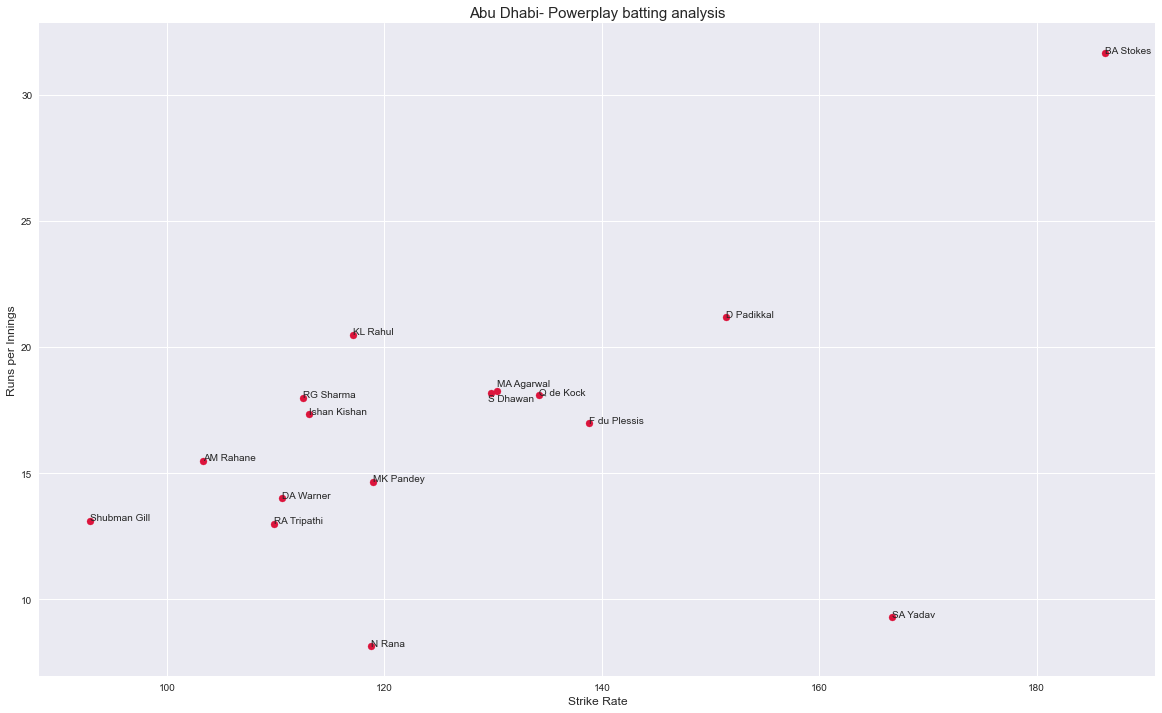

In [50]:
plt.figure(figsize = (20,12))

plt.scatter(SZ_Powerplay['Strike_rate'], SZ_Powerplay['RPI'], c = 'crimson')

for i in range(len(SZ_Powerplay)):
    if SZ_Powerplay['striker'][i] == 'MA Agarwal':
        plt.text(SZ_Powerplay['Strike_rate'][i], SZ_Powerplay['RPI'][i] + 0.2, SZ_Powerplay['striker'][i])
    elif SZ_Powerplay['striker'][i] =='S Dhawan':
        plt.text(SZ_Powerplay['Strike_rate'][i] - 0.2, SZ_Powerplay['RPI'][i] - 0.3,SZ_Powerplay['striker'][i])

    else:
        plt.text(SZ_Powerplay['Strike_rate'][i], SZ_Powerplay['RPI'][i], SZ_Powerplay['striker'][i])

        
plt.title('Abu Dhabi- Powerplay batting analysis', fontsize = 15)
plt.xlabel('Strike Rate', fontsize = 12)
plt.ylabel('Runs per Innings', fontsize = 12)

plt.show()

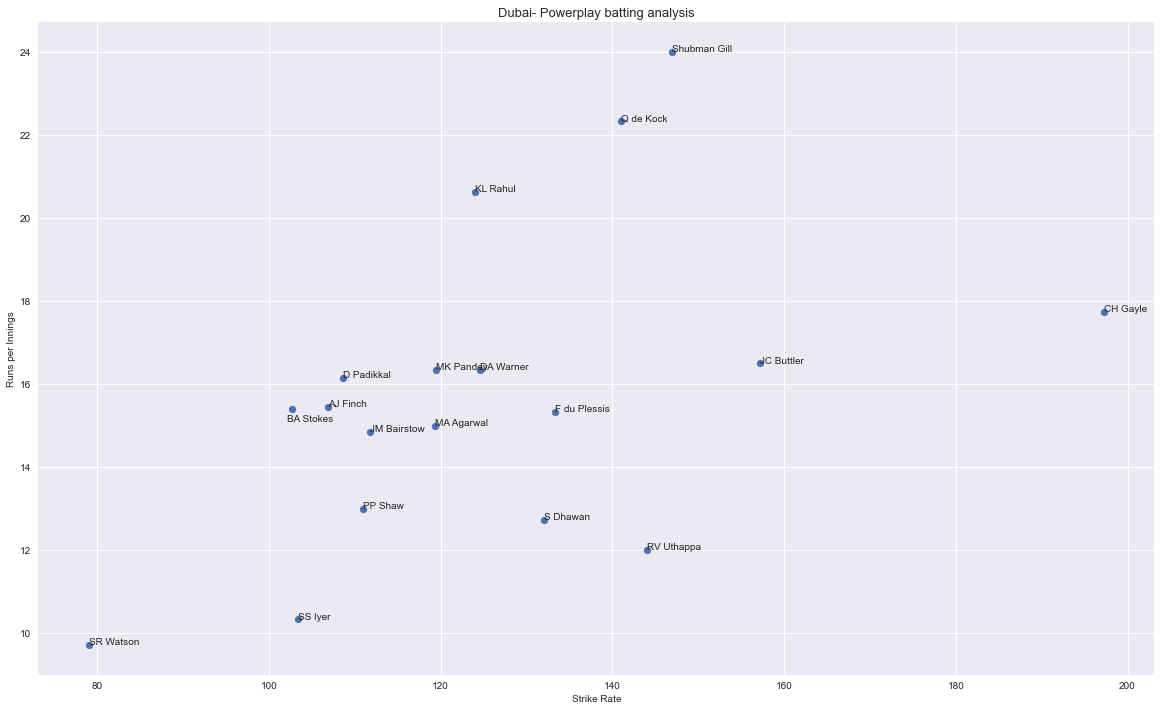

In [51]:
plt.figure(figsize = (20,12))

plt.scatter(Dubai_Powerplay['Strike_rate'], Dubai_Powerplay['RPI'])

for i in range(len(Dubai_Powerplay)):
    if Dubai_Powerplay['striker'][i] == 'BA Stokes':
        plt.text(Dubai_Powerplay['Strike_rate'][i] - 0.6, Dubai_Powerplay['RPI'][i] - 0.3, Dubai_Powerplay['striker'][i])
    else:
        plt.text(Dubai_Powerplay['Strike_rate'][i], Dubai_Powerplay['RPI'][i], Dubai_Powerplay['striker'][i])


plt.title('Dubai- Powerplay batting analysis', fontsize = 13)
plt.xlabel('Strike Rate', fontsize = 10)
plt.ylabel('Runs per Innings', fontsize = 10)

plt.show()

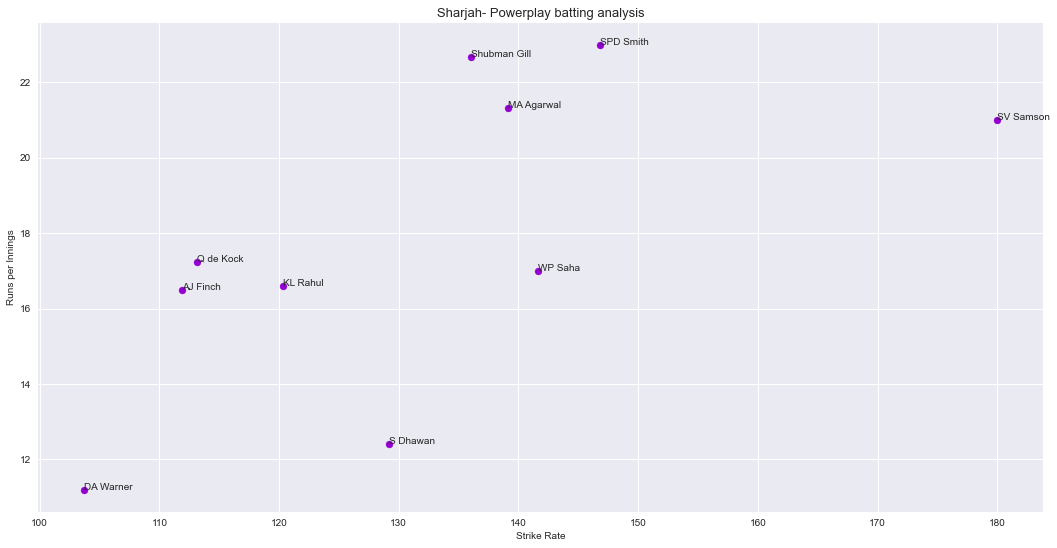

In [52]:
plt.figure(figsize = (18,9))

plt.scatter(Sharjah_Powerplay['Strike_rate'], Sharjah_Powerplay['RPI'], c = 'darkviolet')

for i in range(len(Sharjah_Powerplay)):
        plt.text(Sharjah_Powerplay['Strike_rate'][i], Sharjah_Powerplay['RPI'][i], Sharjah_Powerplay['striker'][i])

plt.title('Sharjah- Powerplay batting analysis', fontsize = 13)
plt.xlabel('Strike Rate', fontsize = 10)
plt.ylabel('Runs per Innings', fontsize = 10)

plt.show()

# Average score in every stadium

In [72]:
    df1['isDot'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 0 else 0)
    df1['isOne'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 1 else 0)
    df1['isTwo'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 2 else 0)
    df1['isThree'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 3 else 0)
    df1['isFour'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df1['isSix'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)

In [73]:
first_innings_1 = df1[df1.innings == 1].groupby(['venue'])['Total_runs','isBowlerWk'].sum()

In [74]:
first_innings_2 = df1[df1.innings == 1].groupby(['venue'])['match_id'].nunique().to_frame()

In [75]:
first_innings_3 = pd.merge(first_innings_1,first_innings_2, on = 'venue')
first_innings_3

,Total_runs,isBowlerWk,match_id
venue,,,
Dubai International Cricket Stadium,5502,167,33
Sharjah Cricket Stadium,3084,98,18
Sheikh Zayed Stadium,4607,153,29


In [76]:
first_innings_3['Average_1st_innings_score'] = first_innings_3['Total_runs']/first_innings_3['match_id']

In [77]:
first_innings_3['avg_RPW_1st_innings'] = first_innings_3['Total_runs']/first_innings_3['isBowlerWk']

#### Average 1st innings score

In [78]:
first_innings = first_innings_3[['Average_1st_innings_score','avg_RPW_1st_innings']]
first_innings

,Average_1st_innings_score,avg_RPW_1st_innings
venue,,
Dubai International Cricket Stadium,166.727273,32.946108
Sharjah Cricket Stadium,171.333333,31.469388
Sheikh Zayed Stadium,158.862069,30.111111


In [79]:
def wickets(player_dismissed):
    if type(player_dismissed) == str:
        return 1
    else:
        return 0

In [80]:
df1['wickets'] = df1.apply(lambda x: wickets(x['player_dismissed']), axis= 1)

#### Average 1st innings wicket

In [81]:
first_innings_wk = df1[df1.innings == 1].groupby(['venue'])['wickets'].sum().to_frame()
first_innings_wk['Average_wicket_1st_innings'] = first_innings_wk['wickets']/first_innings_2['match_id']

In [82]:
first_innings = pd.merge(first_innings, first_innings_wk, on = 'venue')
first_innings = first_innings[['Average_1st_innings_score','Average_wicket_1st_innings','avg_RPW_1st_innings']]


In [83]:
first_innings

,Average_1st_innings_score,Average_wicket_1st_innings,avg_RPW_1st_innings
venue,,,
Dubai International Cricket Stadium,166.727273,5.454545,32.946108
Sharjah Cricket Stadium,171.333333,5.833333,31.469388
Sheikh Zayed Stadium,158.862069,5.827586,30.111111


#### Average 2nd innings

In [84]:
second_innings_1 = df1[df1.innings == 2].groupby(['venue'])['Total_runs','wickets'].sum()
second_innings_1

,Total_runs,wickets
venue,,
Dubai International Cricket Stadium,4900,205
Sharjah Cricket Stadium,2840,89
Sheikh Zayed Stadium,4223,156


In [85]:
second_innings_2 = df1[df1.innings == 2].groupby(['venue'])['match_id'].nunique().to_frame()
second_innings_2

,match_id
venue,
Dubai International Cricket Stadium,33
Sharjah Cricket Stadium,18
Sheikh Zayed Stadium,29


In [86]:
second_innings_3 = pd.merge(second_innings_1, second_innings_2, on = 'venue')
second_innings_3['Avg_2nd_innings_score']  = second_innings_3['Total_runs']/second_innings_3['match_id']
second_innings_3['avg_RPW_2nd_innings'] = second_innings_3['Total_runs']/second_innings_3['wickets']
second_innings_3['Avg_2nd_innings_wickets'] = second_innings_3['wickets']/second_innings_3['match_id']

In [87]:
second_innings = second_innings_3[['Avg_2nd_innings_score','avg_RPW_2nd_innings','Avg_2nd_innings_wickets']]

In [88]:
second_innings

,Avg_2nd_innings_score,avg_RPW_2nd_innings,Avg_2nd_innings_wickets
venue,,,
Dubai International Cricket Stadium,148.484848,23.902439,6.212121
Sharjah Cricket Stadium,157.777778,31.910112,4.944444
Sheikh Zayed Stadium,145.620690,27.070513,5.379310


### Overall stats

In [89]:
Overall_Innings = pd.merge(first_innings, second_innings, on = 'venue')

In [90]:
Overall_Innings['Average_1st_innings_score'] = Overall_Innings['Average_1st_innings_score'].round(0)
Overall_Innings['Average_wicket_1st_innings'] = Overall_Innings['Average_wicket_1st_innings'].round(0)
Overall_Innings['avg_RPW_1st_innings'] = Overall_Innings['avg_RPW_1st_innings'].round(0)
Overall_Innings['Avg_2nd_innings_score'] = Overall_Innings['Avg_2nd_innings_score'].round(0)
Overall_Innings['avg_RPW_2nd_innings'] = Overall_Innings['avg_RPW_2nd_innings'].round(0)
Overall_Innings['Avg_2nd_innings_wickets'] = Overall_Innings['Avg_2nd_innings_wickets'].round(0)
Overall_Innings = Overall_Innings.astype(int)

In [91]:
Overall_Innings

,Average_1st_innings_score,Average_wicket_1st_innings,avg_RPW_1st_innings,Avg_2nd_innings_score,avg_RPW_2nd_innings,Avg_2nd_innings_wickets
venue,,,,,,
Dubai International Cricket Stadium,167,5,33,148,24,6
Sharjah Cricket Stadium,171,6,31,158,32,5
Sheikh Zayed Stadium,159,6,30,146,27,5


In [92]:
Venue = ['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium']
Average_1stinnings_score = [159, 163, 152]
Average_RPI_1stinnings = [31,30,29]
Average_2ndinnings_score = [142,150,139]
Average_RPI_2ndinnings = [23,30,26]

In [93]:
w = 0.1

In [94]:
bar1 = np.arange(len(Venue))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]

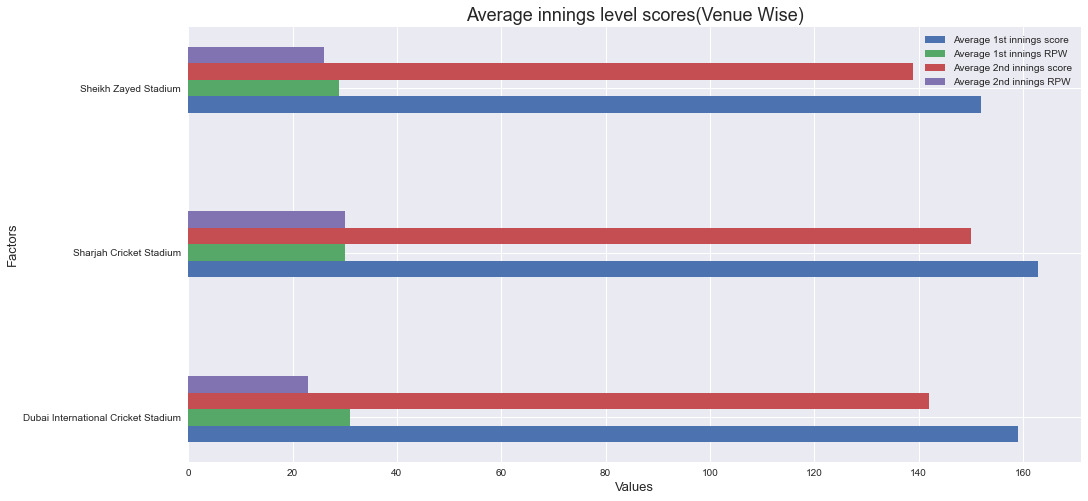

In [95]:
plt.figure(figsize = (16,8))
plt.barh(bar1, Average_1stinnings_score, w, label = 'Average 1st innings score')
plt.barh(bar2, Average_RPI_1stinnings, w, label = 'Average 1st innings RPW')
plt.barh(bar3, Average_2ndinnings_score, w, label = 'Average 2nd innings score')
plt.barh(bar4, Average_RPI_2ndinnings, w, label = 'Average 2nd innings RPW')
plt.xlabel('Values', fontsize  = 13)
plt.ylabel('Factors', fontsize  = 13)
plt.title('Average innings level scores(Venue Wise)', fontsize = 18)
plt.yticks(bar1+w, Venue,)
plt.legend()
plt.show()

### Average score per phases 

#### Inning-1

In [96]:
innings1_phase1 = df1[df1.innings == 1].groupby(['venue','Phases'])['Total_runs'].sum()

In [97]:
innings1_phase2 = df1[df1.innings == 1].groupby(['venue','Phases'])['match_id'].nunique()
innings1_phase2

venue                                Phases   
Dubai International Cricket Stadium  Middle       33
                                     Powerplay    33
                                     death        33
Sharjah Cricket Stadium              Middle       18
                                     Powerplay    18
                                     death        18
Sheikh Zayed Stadium                 Middle       29
                                     Powerplay    29
                                     death        28
Name: match_id, dtype: int64

In [98]:
innings1_phase3 = pd.merge(innings1_phase1, innings1_phase2, on = ['venue','Phases'])
innings1_phase3['Average_Runs_per_phase_1'] = innings1_phase3['Total_runs']/innings1_phase3['match_id']

In [99]:
innings1_phase3 = innings1_phase3.reset_index()

In [100]:
innings1_phase3 = innings1_phase3[['venue','Phases','Average_Runs_per_phase_1']].set_index(['venue','Phases'])

#### Inning-2

In [101]:
innings2_phase1 = df1[df1.innings == 2].groupby(['venue','Phases'])['Total_runs'].sum().to_frame()
innings2_phase1

Total_runs
venue                               Phases               
Dubai International Cricket Stadium Middle           2398
                                    Powerplay        1388
                                    death            1114
Sharjah Cricket Stadium             Middle           1431
                                    Powerplay         863
                                    death             546
Sheikh Zayed Stadium                Middle           2206
                                    Powerplay        1211
                                    death             806

In [102]:
innings2_phase2 = df1[df1.innings == 2].groupby(['venue','Phases'])['match_id'].nunique().to_frame()


In [103]:
innings2_phase3 = pd.merge(innings2_phase1, innings2_phase2, on = ['venue','Phases'])
innings2_phase3

Total_runs  match_id
venue                               Phases                         
Dubai International Cricket Stadium Middle           2398        33
                                    Powerplay        1388        33
                                    death            1114        32
Sharjah Cricket Stadium             Middle           1431        18
                                    Powerplay         863        18
                                    death             546        16
Sheikh Zayed Stadium                Middle           2206        29
                                    Powerplay        1211        29
                                    death             806        26

In [104]:
innings2_phase3['Avg_runs_per_phase2'] = innings2_phase3['Total_runs']/innings2_phase3['match_id']
innings2_phase3 = innings2_phase3.reset_index()
innings2_phase3 = innings2_phase3[['venue','Phases','Avg_runs_per_phase2']].set_index(['venue','Phases'])

In [105]:
innings2_phase3

Avg_runs_per_phase2
venue                               Phases                        
Dubai International Cricket Stadium Middle               72.666667
                                    Powerplay            42.060606
                                    death                34.812500
Sharjah Cricket Stadium             Middle               79.500000
                                    Powerplay            47.944444
                                    death                34.125000
Sheikh Zayed Stadium                Middle               76.068966
                                    Powerplay            41.758621
                                    death                31.000000

#### Overall phase

In [106]:
Overall_Phase = pd.merge(innings1_phase3, innings2_phase3, on = ['venue','Phases'])

In [107]:
Overall_Phase = Overall_Phase.round(0).astype(int)
Overall_Phase

Average_Runs_per_phase_1  \
venue                               Phases                                
Dubai International Cricket Stadium Middle                           77   
                                    Powerplay                        44   
                                    death                            45   
Sharjah Cricket Stadium             Middle                           80   
                                    Powerplay                        44   
                                    death                            47   
Sheikh Zayed Stadium                Middle                           74   
                                    Powerplay                        43   
                                    death                            44   

                                               Avg_runs_per_phase2  
venue                               Phases                          
Dubai International Cricket Stadium Middle                      73  
                                    Powerplay                   42  
                                    death                       35  
Sharjah Cricket Stadium             Middle                      80  
                                    Powerplay                   48  
                                    death                       34  
Sheikh Zayed Stadium                Middle                      76  
                                    Powerplay                   42  
                                    death                       31

In [108]:
df1 = df1.fillna(0)

In [109]:
def Total_runs(runs_off_bat,extras):
    return runs_off_bat + extras

In [110]:
df1['Total_runs'] = df1.apply(lambda x: Total_runs(x['runs_off_bat'], x['extras']), axis = 1)

In [111]:
df1

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk,Phases,isDot,isOne,isTwo,isThree,isFour,isSix,Total_runs,wickets
94549,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,6.5,Mumbai Indians,Kolkata Knight Riders,AT Rayudu,AP Tare,JH Kallis,2,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,0,1,0,0,0,2,0
94550,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,6.6,Mumbai Indians,Kolkata Knight Riders,AT Rayudu,AP Tare,JH Kallis,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,1,0,0,0,0,0,0,0
94551,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,7.2,Mumbai Indians,Kolkata Knight Riders,AT Rayudu,AP Tare,Shakib Al Hasan,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,1,0,0,0,0,0,0,0
94552,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,7.3,Mumbai Indians,Kolkata Knight Riders,AT Rayudu,AP Tare,Shakib Al Hasan,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,1,0,0,0,0,1,0
94553,729279,2014,2014-04-16,Sheikh Zayed Stadium,2,7.4,Mumbai Indians,Kolkata Knight Riders,AP Tare,AT Rayudu,Shakib Al Hasan,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193611,1237181,2020,2020-11-10,Dubai International Cricket Stadium,1,13.4,Delhi Capitals,Mumbai Indians,RR Pant,SS Iyer,KH Pandya,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,1,0,0,0,0,1,0
193612,1237181,2020,2020-11-10,Dubai International Cricket Stadium,1,12.2,Delhi Capitals,Mumbai Indians,SS Iyer,RR Pant,NM Coulter-Nile,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,1,0,0,0,0,1,0
193613,1237181,2020,2020-11-10,Dubai International Cricket Stadium,1,13.6,Delhi Capitals,Mumbai Indians,SS Iyer,RR Pant,KH Pandya,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,1,0,0,0,0,1,0
193614,1237181,2020,2020-11-10,Dubai International Cricket Stadium,1,13.7,Delhi Capitals,Mumbai Indians,RR Pant,SS Iyer,KH Pandya,4,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,Middle,0,0,0,0,1,0,4,0


### indepth venue analysis

In [112]:
venue_stats = df1.groupby(['venue'])['isDot','isTwo','isThree','isFour','isSix','isOne','Total_runs'].sum()
venue_stats

,isDot,isTwo,isThree,isFour,isSix,isOne,Total_runs
venue,,,,,,,
Dubai International Cricket Stadium,3154,601,32,857,359,3075,10461
Sharjah Cricket Stadium,1669,240,12,415,296,1685,5924
Sheikh Zayed Stadium,2694,559,26,782,255,2608,8857


In [113]:
venue_stats_1 = df1.groupby(['venue'])['ball'].count()

In [114]:
venue_stats = pd.merge(venue_stats, venue_stats_1, on = 'venue')
venue_stats

,isDot,isTwo,isThree,isFour,isSix,isOne,Total_runs,ball
venue,,,,,,,,
Dubai International Cricket Stadium,3154,601,32,857,359,3075,10461,8080
Sharjah Cricket Stadium,1669,240,12,415,296,1685,5924,4317
Sheikh Zayed Stadium,2694,559,26,782,255,2608,8857,6925


In [115]:
def dot_percentage(isDot, Total_runs):
    return 100*isDot/Total_runs

def Boundary_percent(isFour, isSix, Total_runs):
    return 100*(isFour + isSix)/Total_runs

def Strike_rotation_percent(isOne, isTwo, isThree, Total_runs):
    return 100*(isOne + isTwo + isThree)/Total_runs

def Balls_per_boundary(ball, boundaries):
    if boundaries>0:
        return ball/boundaries
    else:
        return ball/1




In [116]:
venue_stats['Dot_percent'] = venue_stats.apply(lambda x: dot_percentage(x['isDot'], x['Total_runs']), axis = 1)

In [117]:
venue_stats['Balls_per_boundary'] = venue_stats.apply(lambda x: Balls_per_boundary(x['ball'], x['isFour'] + x['isSix']), axis = 1)

In [118]:
venue_stats['Strike_rotation_percent'] = venue_stats.apply(lambda x: Strike_rotation_percent(x['isOne'], x['isTwo'],x['isThree'],x['Total_runs']), axis = 1)

In [119]:
venue_stats = venue_stats.round(1)

In [120]:
venue_stats[['Dot_percent','Balls_per_boundary','Strike_rotation_percent']]

,Dot_percent,Balls_per_boundary,Strike_rotation_percent
venue,,,
Dubai International Cricket Stadium,30.2,6.6,35.4
Sharjah Cricket Stadium,28.2,6.1,32.7
Sheikh Zayed Stadium,30.4,6.7,36.1


#### Phase wise 

In [121]:
venue_stats_phase = df1.groupby(['venue','Phases'])['isDot','isTwo','isThree','isFour','isSix','isOne','Total_runs'].sum()
venue_stats_phase

isDot  isTwo  isThree  isFour  \
venue                               Phases                                     
Dubai International Cricket Stadium Middle      1419    295       12     329   
                                    Powerplay   1237    129       15     336   
                                    death        498    177        5     192   
Sharjah Cricket Stadium             Middle       736    131        6     145   
                                    Powerplay    646     51        5     189   
                                    death        287     58        1      81   
Sheikh Zayed Stadium                Middle      1200    319       12     310   
                                    Powerplay   1083    111       10     294   
                                    death        411    129        4     178   

                                               isSix  isOne  Total_runs  
venue                               Phases                               
Dubai International Cricket Stadium Middle       161   1849        4946  
                                    Powerplay     73    644        2915  
                                    death        125    582        2600  
Sharjah Cricket Stadium             Middle       143   1035        2875  
                                    Powerplay     55    355        1651  
                                    death         98    295        1398  
Sheikh Zayed Stadium                Middle       118   1577        4354  
                                    Powerplay     57    559        2475  
                                    death         80    472        2028

In [122]:
venue_stats_phase_1 = df1.groupby(['venue','Phases'])['ball'].count()

In [123]:
venue_stats_phase = pd.merge(venue_stats_phase, venue_stats_phase_1, on = ['venue','Phases'])

In [124]:
venue_stats_phase['Dot_percent'] = venue_stats_phase.apply(lambda x: dot_percentage(x['isDot'], x['Total_runs']), axis = 1)
venue_stats_phase['Balls_per_boundary'] = venue_stats_phase.apply(lambda x: Balls_per_boundary(x['ball'], x['isFour'] + x['isSix']), axis = 1)
venue_stats_phase['Strike_rotation_percent'] = venue_stats_phase.apply(lambda x: Strike_rotation_percent(x['isOne'], x['isTwo'],x['isThree'],x['Total_runs']), axis = 1)

In [125]:
venue_stats_phase = venue_stats_phase.round(1)
venue_stats_phase[['Dot_percent','Balls_per_boundary','Strike_rotation_percent']]


Dot_percent  \
venue                               Phases                   
Dubai International Cricket Stadium Middle            28.7   
                                    Powerplay         42.4   
                                    death             19.2   
Sharjah Cricket Stadium             Middle            25.6   
                                    Powerplay         39.1   
                                    death             20.5   
Sheikh Zayed Stadium                Middle            27.6   
                                    Powerplay         43.8   
                                    death             20.3   

                                               Balls_per_boundary  \
venue                               Phases                          
Dubai International Cricket Stadium Middle                    8.3   
                                    Powerplay                 6.0   
                                    death                     5.0   
Sharjah Cricket Stadium             Middle                    7.6   
                                    Powerplay                 5.3   
                                    death                     4.6   
Sheikh Zayed Stadium                Middle                    8.3   
                                    Powerplay                 6.0   
                                    death                     4.9   

                                               Strike_rotation_percent  
venue                               Phases                              
Dubai International Cricket Stadium Middle                        43.6  
                                    Powerplay                     27.0  
                                    death                         29.4  
Sharjah Cricket Stadium             Middle                        40.8  
                                    Powerplay                     24.9  
                                    death                         25.3  
Sheikh Zayed Stadium                Middle                        43.8  
                                    Powerplay                     27.5  
                                    death                         29.8

### Average innings score(Team wise)

#### 1st Innings

In [126]:
innings1_team1 = df1[df1.innings == 1].groupby(['venue','batting_team'])['Total_runs'].sum().to_frame()


innings1_team2 = df1[df1.innings == 1].groupby(['venue','batting_team'])['match_id'].nunique().to_frame()

innings_1_team3 = df1[df1.innings == 1].groupby(['venue','batting_team'])['ball'].count().to_frame()

innings1_team = pd.merge(innings1_team1, innings1_team2, on = ['venue','batting_team']).merge(innings_1_team3, on = ['venue','batting_team'])

innings1_team['Average 1st innngs score'] = innings1_team['Total_runs']/innings1_team['match_id']

In [127]:
innings1_team = innings1_team.reset_index()
innings1_team = innings1_team[['venue','batting_team','Average 1st innngs score','match_id']].set_index(['venue','batting_team']).rename(columns = {'match_id':'matches'}).round(2)

In [128]:
innings1_team

Average 1st innngs score  \
venue                               batting_team                                            
Dubai International Cricket Stadium Chennai Super Kings                            153.50   
                                    Delhi Capitals                                 159.86   
                                    Kolkata Knight Riders                          175.75   
                                    Mumbai Indians                                 158.00   
                                    Punjab Kings                                   170.00   
                                    Rajasthan Royals                               165.50   
                                    Royal Challengers Bangalore                    160.40   
                                    Sunrisers Hyderabad                            183.00   
Sharjah Cricket Stadium             Chennai Super Kings                            146.50   
                                    Delhi Capitals                                 185.67   
                                    Kolkata Knight Riders                          149.50   
                                    Mumbai Indians                                 160.67   
                                    Punjab Kings                                   208.00   
                                    Rajasthan Royals                               203.50   
                                    Royal Challengers Bangalore                    161.67   
                                    Sunrisers Hyderabad                            145.00   
Sheikh Zayed Stadium                Chennai Super Kings                            169.00   
                                    Delhi Capitals                                 175.50   
                                    Kolkata Knight Riders                          154.71   
                                    Mumbai Indians                                 187.20   
                                    Punjab Kings                                   156.67   
                                    Rajasthan Royals                               153.00   
                                    Royal Challengers Bangalore                    129.25   
                                    Sunrisers Hyderabad                            145.67   

                                                                 matches  
venue                               batting_team                          
Dubai International Cricket Stadium Chennai Super Kings                2  
                                    Delhi Capitals                     7  
                                    Kolkata Knight Riders              4  
                                    Mumbai Indians                     4  
                                    Punjab Kings                       3  
                                    Rajasthan Royals                   2  
                                    Royal Challengers Bangalore        5  
                                    Sunrisers Hyderabad                6  
Sharjah Cricket Stadium             Chennai Super Kings                2  
                                    Delhi Capitals                     3  
                                    Kolkata Knight Riders              2  
                                    Mumbai Indians                     3  
                                    Punjab Kings                       2  
                                    Rajasthan Royals                   2  
                                    Royal Challengers Bangalore        3  
                                    Sunrisers Hyderabad                1  
Sheikh Zayed Stadium                Chennai Super Kings                3  
                                    Delhi Capitals                     2  
                                    Kolkata Knight Riders              7  
                                    Mumbai Indians                     

#### 2nd Innings

In [129]:
innings2_team1 = df1[df1.innings == 2].groupby(['venue','batting_team'])['Total_runs'].sum().to_frame()


innings2_team2 = df1[df1.innings == 2].groupby(['venue','batting_team'])['match_id'].nunique().to_frame()

innings_2_team3 = df1[df1.innings == 2].groupby(['venue','batting_team'])['ball'].count().to_frame()

innings2_team = pd.merge(innings2_team1, innings2_team2, on = ['venue','batting_team']).merge(innings_2_team3, on = ['venue','batting_team'])

innings2_team['Average 1st innngs score'] = innings2_team['Total_runs']/innings2_team['match_id']

In [130]:
innings2_team = innings2_team.reset_index()
inning2_team = innings2_team[['venue','batting_team','Average 1st innngs score','match_id']].set_index(['venue','batting_team']).rename(columns = {'match_id':'matches'}).round(2)

In [131]:
inning2_team

Average 1st innngs score  \
venue                               batting_team                                            
Dubai International Cricket Stadium Chennai Super Kings                            153.00   
                                    Delhi Capitals                                 155.25   
                                    Mumbai Indians                                 156.50   
                                    Punjab Kings                                   151.80   
                                    Rajasthan Royals                               142.40   
                                    Royal Challengers Bangalore                    135.25   
                                    Sunrisers Hyderabad                            142.50   
Sharjah Cricket Stadium             Chennai Super Kings                            173.00   
                                    Delhi Capitals                                 155.50   
                                    Kolkata Knight Riders                          161.00   
                                    Mumbai Indians                                 116.00   
                                    Punjab Kings                                   173.33   
                                    Rajasthan Royals                               182.00   
                                    Royal Challengers Bangalore                    147.00   
                                    Sunrisers Hyderabad                            141.75   
Sheikh Zayed Stadium                Chennai Super Kings                            159.00   
                                    Delhi Capitals                                 130.00   
                                    Kolkata Knight Riders                          138.00   
                                    Mumbai Indians                                 150.75   
                                    Punjab Kings                                   170.33   
                                    Rajasthan Royals                               141.67   
                                    Royal Challengers Bangalore                    121.50   
                                    Sunrisers Hyderabad                            155.67   

                                                                 matches  
venue                               batting_team                          
Dubai International Cricket Stadium Chennai Super Kings                7  
                                    Delhi Capitals                     4  
                                    Mumbai Indians                     4  
                                    Punjab Kings                       5  
                                    Rajasthan Royals                   5  
                                    Royal Challengers Bangalore        4  
                                    Sunrisers Hyderabad                4  
Sharjah Cricket Stadium             Chennai Super Kings                2  
                                    Delhi Capitals                     2  
                                    Kolkata Knight Riders              2  
                                    Mumbai Indians                     1  
                                    Punjab Kings                       3  
                                    Rajasthan Royals                   2  
                                    Royal Challengers Bangalore        2  
                                    Sunrisers Hyderabad                4  
Sheikh Zayed Stadium                Chennai Super Kings                3  
                                    Delhi Capitals                     4  
                                    Kolkata Knight Riders              4  
                                    Mumbai Indians                     4  
                                    Punjab Kings                       3  
                                    Rajasthan Royals                   6  
              

In [99]:
    df1['isDot'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 0 else 0)
    df1['isOne'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 1 else 0)
    df1['isTwo'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 2 else 0)
    df1['isThree'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 3 else 0)
    df1['isFour'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df1['isSix'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)

In [100]:
df1 = df1.to_excel('df1.xls')

### Head to head overall

In [15]:
    df['isDot'] = df['runs_off_bat'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)

In [16]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200658,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
200659,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.2,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
200660,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.1,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
200661,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,8.4,Sunrisers Hyderabad,Rajasthan Royals,KS Williamson,V Shankar,C Sakariya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0


In [17]:
def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [18]:
df['isBowlerWk'] = df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['wicket_type']), axis = 1)

def Phases(ball):
    if ball < 5.6:
        return 'Powerplay'
    elif ball < 15.6:
        return 'Middle'
    else:
        return 'death'
        

df['Phases'] = df.apply(lambda x:Phases(x['ball']), axis = 1)

In [19]:
df3 = df.groupby(['striker','bowler','Phases'])['runs_off_bat','isDot','isFour','isSix','isBowlerWk'].sum()

In [20]:
df4 = df.groupby(['striker','bowler','Phases'])['ball'].count()

In [21]:
head_head = pd.merge(df3, df4, on = ['striker','bowler','Phases']).reset_index()

In [22]:
df[df.bowling_team == 'Rajasthan Royals']['bowler'].unique()

array(['SK Trivedi', 'SK Warne', 'YK Pathan', 'SR Watson', 'D Salunkhe',
       'MM Patel', 'Pankaj Singh', 'Sohail Tanvir', 'AD Mascarenhas',
       'RA Jadeja', 'T Henderson', 'Kamran Khan', 'SM Harwood', 'AS Raut',
       'A Singh', 'M Morkel', 'LA Carseldine', 'J Botha',
       'AA Jhunjhunwala', 'A Uniyal', 'SW Tait', 'S Narwal', 'AC Voges',
       'SB Wagh', 'AP Dole', 'FY Fazal', 'AJ Finch', 'AL Menaria',
       'STR Binny', 'JDP Oram', 'ND Doshi', 'LRPL Taylor', 'AA Chavan',
       'KK Cooper', 'BJ Hodge', 'GB Hogg', 'A Chandila', 'S Badree',
       'S Sreesanth', 'R Shukla', 'JP Faulkner', 'Harmeet Singh (2)',
       'PV Tambe', 'VS Malik', 'R Bhatia', 'KW Richardson', 'DS Kulkarni',
       'TG Southee', 'Iqbal Abdulla', 'R Tewatia', 'Ankit Sharma',
       'BCJ Cutting', 'CH Morris', 'DJ Hooda', 'J Theron', 'BB Sran',
       'K Gowtham', 'JD Unadkat', 'B Laughlin', 'S Gopal', 'BA Stokes',
       'DJM Short', 'JC Archer', 'IS Sodhi', 'MK Lomror', 'Anureet Singh',
       'VR Aar

In [23]:
df[df.batting_team == 'Punjab Kings']['striker'].unique()

array(['IK Pathan', 'SM Katich', 'KC Sangakkara', 'Yuvraj Singh',
       'JR Hopes', 'K Goel', 'PP Chawla', 'DPMD Jayawardene', 'S Sohal',
       'B Lee', 'WA Mota', 'S Sreesanth', 'VRV Singh', 'RR Sarwan',
       'TM Srivastava', 'SE Marsh', 'U Kaul', 'LA Pomersbach', 'RR Powar',
       'RS Bopara', 'T Kohli', 'M Kaif', 'MS Bisla', 'YA Abdulla',
       'AB Barath', 'Bipul Sharma', 'J Theron', 'SJ Srivastava',
       'VS Malik', 'RS Sodhi', 'R McLaren', 'AM Nayar', 'KD Karthik',
       'PC Valthaty', 'AC Gilchrist', 'Sunny Singh', 'NJ Rimmington',
       'P Kumar', 'RJ Harris', 'DJ Hussey', 'L Ablish', 'Mandeep Singh',
       'SD Chitnis', 'BA Bhatt', 'JP Faulkner', 'Harmeet Singh',
       'AD Mascarenhas', 'P Dogra', 'N Saini', 'DA Miller',
       'Azhar Mahmood', 'Gurkeerat Singh', 'P Awana', 'M Vohra',
       'R Sathish', 'MS Gony', 'Sandeep Sharma', 'GJ Maxwell',
       'GJ Bailey', 'AR Patel', 'CA Pujara', 'V Sehwag', 'WP Saha',
       'MG Johnson', 'R Dhawan', 'L Balaji', 'Shivam

## 2021 IPL MATCH UPS

### RCB VS KKR

In [24]:
KKR_bowlers = head_head[head_head['bowler'].isin(['AD Russell','Shivam Mavi','CV Varun','SP Narine','M Prasidh Krishna','KL Nagarkoti','Harbhajan Singh','Kuldeep Yadav','Shakib Al Hasan','LH Ferguson'])]

#### Banglore batsman

In [24]:
VK = KKR_bowlers[KKR_bowlers.striker == 'V Kohli']

In [25]:
ABD = KKR_bowlers[KKR_bowlers.striker == 'AB de Villiers']

In [26]:
Maxwell = KKR_bowlers[KKR_bowlers.striker == 'GJ Maxwell']

#### Kolkata batsman

In [27]:
RCB_bowlers = head_head[head_head['bowler'].isin(['YS Chahal','Mohammed Siraj'])]

In [28]:
Gill = RCB_bowlers[RCB_bowlers.striker == 'Shubman Gill']
Gill_1 = Gill.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [29]:
Rana = RCB_bowlers[RCB_bowlers.striker == 'N Rana']
Rana_1 = Rana.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [30]:
Tripathi = RCB_bowlers[RCB_bowlers.striker == 'RA Tripathi']
Tripathi_1 = Tripathi.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [31]:
Narine = RCB_bowlers[RCB_bowlers.striker == 'SP Narine']
Narine_1 = Narine.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [32]:
Karthik = RCB_bowlers[RCB_bowlers.striker == 'KD Karthik']
Karthik_1 = Karthik.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [33]:
Russel = RCB_bowlers[RCB_bowlers.striker == 'AD Russell']
Russel_1 = Russel.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [34]:
Morgan = RCB_bowlers[RCB_bowlers.striker == 'EJG Morgan']
Morgan_1 = Morgan.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum() 

In [45]:
VK_1 = VK.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [46]:
ABD_1 = ABD.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [47]:
Maxwell_1 = Maxwell.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [48]:
pd.concat([VK_1, ABD_1, Maxwell_1])

runs_off_bat  ball  isBowlerWk
striker        bowler                                           
V Kohli        AD Russell                   78    54           1
               CV Varun                     15    18           1
               Harbhajan Singh              87    69           1
               KL Nagarkoti                 11    11           0
               Kuldeep Yadav                37    35           1
               LH Ferguson                  36    19           0
               M Prasidh Krishna            52    25           0
               SP Narine                    99    94           2
               Shakib Al Hasan              45    34           1
               Shivam Mavi                  11     8           0
AB de Villiers AD Russell                   87    38           0
               CV Varun                     13    10           0
               Harbhajan Singh             110    81           3
               KL Nagarkoti                 20     8           0
               Kuldeep Yadav                22    12           0
               LH Ferguson                   7     4           1
               M Prasidh Krishna            29    15           0
               SP Narine                    46    35           3
               Shakib Al Hasan              49    33           0
GJ Maxwell     AD Russell                   23    16           0
               CV Varun                     22    10           0
               Harbhajan Singh              60    30           1
               Kuldeep Yadav                36    14           2
               M Prasidh Krishna            13    14           0
               SP Narine                    52    44           2
               Shakib Al Hasan              29    18           0
               Shivam Mavi                   7     6           0

In [49]:
pd.concat([Gill_1, Rana_1, Tripathi_1, Narine_1, Karthik_1, Russel_1, Morgan_1])

runs_off_bat  ball  isBowlerWk
striker      bowler                                        
Shubman Gill Mohammed Siraj            18    10           0
             YS Chahal                  4     4           0
N Rana       Mohammed Siraj            33    22           1
             YS Chahal                 51    43           3
RA Tripathi  Mohammed Siraj            41    37           2
             YS Chahal                 37    34           0
SP Narine    Mohammed Siraj             2     5           1
             YS Chahal                 12     4           0
KD Karthik   Mohammed Siraj            17    10           1
             YS Chahal                 30    33           3
AD Russell   Mohammed Siraj            18    17           1
             YS Chahal                 80    41           1
EJG Morgan   Mohammed Siraj             1     7           0
             YS Chahal                 22    29           0

### PBKS VS RR

In [50]:
df[df.batting_team == 'Punjab Kings']['striker'].unique()

array(['IK Pathan', 'SM Katich', 'KC Sangakkara', 'Yuvraj Singh',
       'JR Hopes', 'K Goel', 'PP Chawla', 'DPMD Jayawardene', 'S Sohal',
       'B Lee', 'WA Mota', 'S Sreesanth', 'VRV Singh', 'RR Sarwan',
       'TM Srivastava', 'SE Marsh', 'U Kaul', 'LA Pomersbach', 'RR Powar',
       'RS Bopara', 'T Kohli', 'M Kaif', 'MS Bisla', 'YA Abdulla',
       'AB Barath', 'Bipul Sharma', 'J Theron', 'SJ Srivastava',
       'VS Malik', 'RS Sodhi', 'R McLaren', 'AM Nayar', 'KD Karthik',
       'PC Valthaty', 'AC Gilchrist', 'Sunny Singh', 'NJ Rimmington',
       'P Kumar', 'RJ Harris', 'DJ Hussey', 'L Ablish', 'Mandeep Singh',
       'SD Chitnis', 'BA Bhatt', 'JP Faulkner', 'Harmeet Singh',
       'AD Mascarenhas', 'P Dogra', 'N Saini', 'DA Miller',
       'Azhar Mahmood', 'Gurkeerat Singh', 'P Awana', 'M Vohra',
       'R Sathish', 'MS Gony', 'Sandeep Sharma', 'GJ Maxwell',
       'GJ Bailey', 'AR Patel', 'CA Pujara', 'V Sehwag', 'WP Saha',
       'MG Johnson', 'R Dhawan', 'L Balaji', 'Shivam

In [25]:
RR_Bowlers = head_head[head_head['bowler'].isin(['CH Morris','JD Unadkat','S Gopal','R Parag','Kartik Tyagi','C Sakariya','Shivam Dube','M Markande','R Tewatia','M Rahman'])]

In [52]:
Henriques = RR_Bowlers[RR_Bowlers.striker == 'MC Henriques']
Henriques_1 = Henriques.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [53]:
Pooran = RR_Bowlers[RR_Bowlers.striker == 'N Pooran']
Pooran_1 = Pooran.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [54]:
Hooda = RR_Bowlers[RR_Bowlers.striker == 'DJ Hooda']
Hooda_1 = Hooda.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [55]:
Gayle = RR_Bowlers[RR_Bowlers.striker == 'CH Gayle']
Gayle_1 = Gayle.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [56]:
Rahul = RR_Bowlers[RR_Bowlers.striker == 'KL Rahul']
Rahul_1 = Rahul.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [57]:
Agarwal = RR_Bowlers[RR_Bowlers.striker == 'MA Agarwal']
Agarwal_1 = Agarwal.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [58]:
pd.concat([Henriques_1, Pooran_1, Hooda_1, Gayle_1, Rahul_1, Agarwal_1])

runs_off_bat  ball  isBowlerWk
striker      bowler                                      
MC Henriques CH Morris                8     7           0
             JD Unadkat              18     6           0
N Pooran     CH Morris                0     1           1
             JD Unadkat               9     8           0
             Kartik Tyagi             9     3           0
             S Gopal                  4     4           0
DJ Hooda     C Sakariya              13     6           0
             CH Morris               16    12           2
             JD Unadkat              21    10           1
             M Markande               6     4           0
             R Parag                  0     1           0
             S Gopal                 38    12           0
CH Gayle     C Sakariya               0     2           0
             CH Morris               51    53           3
             JD Unadkat              72    28           0
             Kartik Tyagi            25    14           0
             M Markande              13     6           0
             R Parag                  1     2           1
             S Gopal                 15     7           0
KL Rahul     C Sakariya              11     9           1
             CH Morris               63    35           1
             JD Unadkat              72    43           1
             Kartik Tyagi             7     4           0
             M Markande              31    17           1
             R Parag                  6     3           0
             S Gopal                 42    40           0
MA Agarwal   C Sakariya               5     4           1
             CH Morris               23    23           1
             JD Unadkat              25    15           0
             M Markande               9     5           0
             S Gopal                 41    16           0

### DC VS SRH

#### Sunrisers Hyderbad

In [136]:
DC_bowlers = head_head[head_head['bowler'].isin(['Lalit Yadav','A Nortje','MP Stoinis','R Ashwin','AR Patel','Avesh Khan','K Rabada','I Sharma'])]

In [137]:
Jadhav = DC_bowlers[DC_bowlers.striker == 'KM Jadhav']
Jadhav_1 = Jadhav.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [138]:
Pandey = DC_bowlers[DC_bowlers.striker == 'MK Pandey']
Pandey_1 = Pandey.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [139]:
Saha = DC_bowlers[DC_bowlers.striker == 'WP Saha']
Saha_1 = Saha.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [140]:
Williamson = DC_bowlers[DC_bowlers.striker == 'KS Williamson']
Williamson_1 = Williamson.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [141]:
Warner = DC_bowlers[DC_bowlers.striker == 'DA Warner']
Warner_1 = Warner.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()


In [142]:
pd.concat([Jadhav_1, Pandey_1, Saha_1, Williamson_1, Warner_1])

runs_off_bat  ball  isBowlerWk
striker       bowler                                    
KM Jadhav     A Nortje               1     2           1
              AR Patel              11    12           1
              Avesh Khan            15    13           0
              I Sharma              21    13           1
              K Rabada               8     6           1
              R Ashwin              25    24           0
MK Pandey     A Nortje              17    14           0
              AR Patel              39    62           2
              Avesh Khan             1     2           0
              I Sharma              31    45           1
              K Rabada              14    15           1
              MP Stoinis            19    12           1
              R Ashwin              58    55           2
WP Saha       A Nortje               8     5           1
              AR Patel              21    11           0
              I Sharma               3     6           1
              K Rabada              20     9           0
              MP Stoinis             5     3           0
              R Ashwin              31    24           0
KS Williamson A Nortje              15    12           0
              AR Patel              59    46           0
              Avesh Khan            20    12           0
              I Sharma              25     9           1
              K Rabada              32    26           1
              MP Stoinis            26    16           1
              R Ashwin              52    37           0
DA Warner     A Nortje              27    16           0
              AR Patel              95    60           2
              I Sharma              66    57           1
              K Rabada              61    39           3
              MP Stoinis            18    18           0
              R Ashwin              95    89           3

#### Delhi Batsman

In [143]:
df[df.bowling_team == 'Sunrisers Hyderabad']['bowler'].unique()

array(['A Mishra', 'NLTC Perera', 'I Sharma', 'DW Steyn', 'CL White',
       'A Ashish Reddy', 'Ankit Sharma', 'GH Vihari', 'Anand Rajan',
       'KV Sharma', 'DJG Sammy', 'B Kumar', 'IK Pathan',
       'Y Venugopal Rao', 'MC Henriques', 'Parvez Rasool', 'JO Holder',
       'RS Bopara', 'TA Boult', 'P Kumar', 'Bipul Sharma',
       'Mustafizur Rahman', 'A Nehra', 'BB Sran', 'DJ Hooda',
       'Yuvraj Singh', 'BCJ Cutting', 'KS Williamson', 'Rashid Khan',
       'Mohammad Nabi', 'S Kaul', 'Mohammed Siraj', 'CJ Jordan',
       'B Stanlake', 'Shakib Al Hasan', 'Sandeep Sharma', 'Basil Thampi',
       'YK Pathan', 'CR Brathwaite', 'KK Ahmed', 'S Nadeem', 'V Shankar',
       'Abhishek Sharma', 'T Natarajan', 'MR Marsh', 'Abdul Samad',
       'DA Warner', 'Mujeeb Ur Rahman', 'J Suchith'], dtype=object)

In [144]:
df[df.batting_team == 'Delhi Capitals']['striker'].unique()

array(['G Gambhir', 'S Dhawan', 'V Sehwag', 'MK Tiwary', 'R Bhatia',
       'MF Maharoof', 'VY Mahesh', 'KD Karthik', 'Shoaib Malik',
       'AB de Villiers', 'GD McGrath', 'Mohammad Asif', 'PJ Sangwan',
       'TM Dilshan', 'A Mishra', 'M Manhas', 'DL Vettori', 'DA Warner',
       'A Nehra', 'Y Nagar', 'AB McDonald', 'S Ladda', 'DP Nannes',
       'MC Henriques', 'UT Yadav', 'KM Jadhav', 'PD Collingwood',
       'Y Venugopal Rao', 'NV Ojha', 'AB Dinda', 'RE van der Merwe',
       'M Morkel', 'IK Pathan', 'AJ Finch', 'UBT Chand', 'JR Hopes',
       'MS Wade', 'TR Birt', 'CA Ingram', 'S Nadeem', 'AB Agarkar',
       'VR Aaron', 'S Sriram', 'GJ Maxwell', 'DAJ Bracewell',
       'DPMD Jayawardene', 'KP Pietersen', 'LRPL Taylor', 'P Negi',
       'AD Russell', 'Sunny Gupta', 'MC Juneja', 'J Botha', 'BMAJ Mendis',
       'BJ Rohrer', 'CM Gautam', 'S Kaul', 'B Chipli', 'JP Duminy',
       'M Vijay', 'MA Agarwal', 'JDS Neesham', 'Mohammed Shami',
       'JD Unadkat', 'Q de Kock', 'LR Shukla',

In [145]:
srh_bowlers = head_head[head_head['bowler'].isin(['Mujeeb Ur Rahman','J Suchith','S Nadeem','KK Ahmed','Sandeep Sharma','S Kaul','Rashid Khan','Mohammad Nabi','JO Holder','B Kumar'])]

In [146]:
Smith = srh_bowlers[srh_bowlers.striker == 'SPD Smith']
Smith_1 = Smith.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [147]:
Rahane =  srh_bowlers[srh_bowlers.striker == 'AM Rahane']
Rahane_1 = Rahane.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [148]:
Hetmyer = srh_bowlers[srh_bowlers.striker == 'SO Hetmyer']
Hetmyer_1 = Hetmyer.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [149]:
Stoinis = srh_bowlers[srh_bowlers.striker == 'MP Stoinis']
Stoinis_1 = Stoinis.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [150]:
Shaw = srh_bowlers[srh_bowlers.striker == 'PP Shaw']
Shaw_1 = Shaw.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [151]:
Pant = srh_bowlers[srh_bowlers.striker == 'RR Pant']
Pant_1 = Pant.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [152]:
Iyer = srh_bowlers[srh_bowlers.striker == 'SS Iyer']
Iyer_1 = Iyer.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [153]:
Dhawan = srh_bowlers[srh_bowlers.striker == 'S Dhawan']
Dhawan_1 = Dhawan.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Dhawan

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
24094,S Dhawan,B Kumar,Powerplay,32,18,5,0,1,34
24192,S Dhawan,J Suchith,Middle,12,4,2,0,0,10
24193,S Dhawan,J Suchith,Powerplay,1,1,0,0,0,2
24218,S Dhawan,JO Holder,Middle,15,4,0,1,0,13
24219,S Dhawan,JO Holder,Powerplay,22,10,3,0,0,20
24220,S Dhawan,JO Holder,death,5,0,1,0,0,2
24245,S Dhawan,KK Ahmed,Powerplay,12,4,1,0,1,11
24299,S Dhawan,Mohammad Nabi,Middle,0,1,0,0,1,1
24300,S Dhawan,Mohammad Nabi,Powerplay,16,5,2,0,0,14
24306,S Dhawan,Mujeeb Ur Rahman,Middle,7,1,1,0,0,5


In [154]:
pd.concat([Smith_1, Rahane_1, Hetmyer_1, Stoinis_1, Shaw_1, Pant_1, Iyer_1, Dhawan_1])

runs_off_bat  ball  isBowlerWk
striker    bowler                                          
SPD Smith  B Kumar                     15    20           0
           J Suchith                   23    17           0
           JO Holder                    0     1           1
           KK Ahmed                    29    15           1
           Rashid Khan                 25    34           1
           S Kaul                      11    12           1
           S Nadeem                    54    22           1
           Sandeep Sharma              28    23           0
AM Rahane  B Kumar                     89    96           6
           J Suchith                   17    14           0
           JO Holder                   22    16           1
           KK Ahmed                     8     7           0
           Mujeeb Ur Rahman             5     6           0
           Rashid Khan                 41    34           1
           S Kaul                      37    38           1
           S Nadeem                    90    73           4
           Sandeep Sharma              71    78           2
SO Hetmyer B Kumar                     19    16           1
           JO Holder                   23    11           0
           KK Ahmed                    27    15           0
           Mohammad Nabi               14    10           1
           Rashid Khan                 36    21           2
           S Kaul                       1     2           1
           S Nadeem                     7     4           0
           Sandeep Sharma              10     8           0
MP Stoinis B Kumar                      4     2           0
           JO Holder                   19     7           0
           KK Ahmed                     2     2           0
           Rashid Khan                  5     7           1
           S Nadeem                    18    19           1
           Sandeep Sharma              16    15           0
PP Shaw    B Kumar                     35    36           2
           J Suchith                    6     8           0
           KK Ahmed                    32    22           2
           Mohammad Nabi                7    10           0
           Rashid Khan                 22    15           1
           S Kaul                      32    13           0
           Sandeep Sharma              24    13           0
RR Pant    B Kumar                     70    32           1
           J Suchith                    1     3           0
           JO Holder                    6     5           0
           KK Ahmed                     8     7           1
           Mohammad Nabi               17     8           1
           Mujeeb Ur Rahman            17    11           2
           Rashid Khan                 81    69           2
           S Kaul                      55    34           1
           Sandeep Sharma              23    24           1
SS Iyer    B Kumar                     38    42           3
           JO Holder                    5     5           1
           KK Ahmed                     9    10           1
           Mohammad Nabi                6     7           0
           Mujeeb Ur Rahman            25    23           1
           Rashid Khan                 69    65           2
           S Kaul                      25    30           1
           S Nadeem                     8     5           0
           Sandeep Sharma              34    50           3
S Dhawan   B Kumar                     32    34           1
           J Suchith                   13    12           0
           JO Holder                   42    35           0
           KK Ahmed                    12    11           1
           Mohammad Nabi               16    15           1
           Mujeeb Ur Rahman             7     5           0
           Rashid Khan                 24    28           2
           S Kaul                       4     9           1
           S Nadeem                    64    36           2
         

In [155]:
pd.concat([Jadhav_1, Pandey_1, Saha_1, Williamson_1, Warner_1])

runs_off_bat  ball  isBowlerWk
striker       bowler                                    
KM Jadhav     A Nortje               1     2           1
              AR Patel              11    12           1
              Avesh Khan            15    13           0
              I Sharma              21    13           1
              K Rabada               8     6           1
              R Ashwin              25    24           0
MK Pandey     A Nortje              17    14           0
              AR Patel              39    62           2
              Avesh Khan             1     2           0
              I Sharma              31    45           1
              K Rabada              14    15           1
              MP Stoinis            19    12           1
              R Ashwin              58    55           2
WP Saha       A Nortje               8     5           1
              AR Patel              21    11           0
              I Sharma               3     6           1
              K Rabada              20     9           0
              MP Stoinis             5     3           0
              R Ashwin              31    24           0
KS Williamson A Nortje              15    12           0
              AR Patel              59    46           0
              Avesh Khan            20    12           0
              I Sharma              25     9           1
              K Rabada              32    26           1
              MP Stoinis            26    16           1
              R Ashwin              52    37           0
DA Warner     A Nortje              27    16           0
              AR Patel              95    60           2
              I Sharma              66    57           1
              K Rabada              61    39           3
              MP Stoinis            18    18           0
              R Ashwin              95    89           3

### MI vs KKR 

In [156]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'A Nehra', 'AM Nayar', 'Harbhajan Singh',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JDP Oram',
       'JJ Bumrah', 'MG Johnson', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [157]:
df[df.batting_team == 'Kolkata Knight Riders']['striker'].unique()

array(['SC Ganguly', 'BB McCullum', 'Mohammad Hafeez', 'RT Ponting',
       'DJ Hussey', 'WP Saha', 'LR Shukla', 'I Sharma', 'M Kartik',
       'AB Agarkar', 'DB Das', 'Salman Butt', 'AB Dinda', 'Umar Gul',
       'BJ Hodge', 'T Taibu', 'A Chopra', 'Iqbal Abdulla',
       'Shoaib Akhtar', 'MC Henriques', 'CH Gayle', 'SB Bangar',
       'Yashpal Singh', 'BAW Mendis', 'AN Ghosh', 'MN van Wyk',
       'AD Mathews', 'Mashrafe Mortaza', 'SS Shaikh', 'OA Shah',
       'CA Pujara', 'MK Tiwary', 'SE Bond', 'RS Gavaskar',
       'Mandeep Singh', 'CK Langeveldt', 'JH Kallis', 'MS Bisla',
       'YK Pathan', 'EJG Morgan', 'G Gambhir', 'R Bhatia',
       'Shakib Al Hasan', 'L Balaji', 'B Lee', 'BJ Haddin', 'SP Goswami',
       'RN ten Doeschate', 'MV Boucher', 'SP Narine', 'Mohammed Shami',
       'R McLaren', 'PJ Sangwan', 'SMSM Senanayake', 'S Narwal',
       'P Dogra', 'MK Pandey', 'RV Uthappa', 'SA Yadav', 'CA Lynn',
       'R Vinay Kumar', 'PP Chawla', 'UT Yadav', 'M Morkel', 'AD Russell',
  

#### KKR Batsman

In [206]:
Mumbai_bowlers = head_head[head_head['bowler'].isin(['AF Milne','TA Boult','J Yadav','RD Chahar','KH Pandya','JJ Bumrah','KA Pollard','DS Kulkarni','PP Chawla'])]

In [256]:
Tripathi = Mumbai_bowlers[Mumbai_bowlers.striker == 'RA Tripathi']
Tripathi_1 = Tripathi.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk','isFour','isSix'].sum()


In [258]:
Gill = Mumbai_bowlers[Mumbai_bowlers.striker == 'Shubman Gill']
Gill_1 = Gill.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk','isFour','isSix'].sum()
Gill_1

runs_off_bat  ball  isBowlerWk  isFour  isSix
striker      bowler                                                   
Shubman Gill JJ Bumrah             19    16           0       2      0
             KA Pollard             1     1           0       0      0
             KH Pandya             13    20           0       0      0
             RD Chahar             37    20           2       1      4
             TA Boult              15    21           1       2      0

In [260]:
Karthik = Mumbai_bowlers[Mumbai_bowlers.striker == 'KD Karthik']
Karthik_1 = Karthik.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk','isFour','isSix'].sum()
Karthik_1

runs_off_bat  ball  isBowlerWk  isFour  isSix
striker    bowler                                                    
KD Karthik DS Kulkarni            16    10           1       0      2
           JJ Bumrah              54    33           0       6      2
           KA Pollard             30    22           1       4      0
           KH Pandya              24    30           2       3      0
           PP Chawla              56    47           2       4      3
           RD Chahar               9     9           2       1      0
           TA Boult               23    15           1       5      0

In [241]:
Rana = Mumbai_bowlers[Mumbai_bowlers.striker == 'N Rana']
Rana_1 = Rana.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [242]:
Russell = Mumbai_bowlers[Mumbai_bowlers.striker == 'AD Russell']
Russell_1 = Russell.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [243]:
Narine = Mumbai_bowlers[Mumbai_bowlers.striker == 'SP Narine']
Narine_1 = Narine.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [244]:
Shakib = Mumbai_bowlers[Mumbai_bowlers.striker == 'Shakib Al Hasan']
Shakib_1 = Shakib.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [245]:
Morgan = Mumbai_bowlers[Mumbai_bowlers.striker == 'EJG Morgan']
Morgan_1 = Morgan.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [246]:
pd.concat([Tripathi_1, Gill_1, Karthik_1, Rana_1, Russell_1, Narine_1, Shakib_1, Morgan_1])

runs_off_bat  ball  isBowlerWk
striker         bowler      Phases                                   
RA Tripathi     AF Milne    Powerplay            16    14           0
                JJ Bumrah   Powerplay             2     5           1
                            death                 1     1           0
                KH Pandya   Powerplay             1     4           1
                            death                 0     1           1
                PP Chawla   Middle                2     4           1
                            Powerplay             5     4           1
                RD Chahar   Middle                3     3           1
                TA Boult    Middle                3     5           0
                            Powerplay             6     7           1
Shubman Gill    JJ Bumrah   Middle                8     4           0
                            Powerplay            11    12           0
                KA Pollard  Middle                1     1           0
                KH Pandya   Middle                6     7           0
                            Powerplay             7    13           0
                RD Chahar   Middle               37    20           2
                TA Boult    Middle                2     3           0
                            Powerplay             8    16           1
                            death                 5     2           0
KD Karthik      DS Kulkarni Middle                2     2           0
                            Powerplay             0     3           1
                            death                14     5           0
                JJ Bumrah   Powerplay             0     3           0
                            death                54    30           0
                KA Pollard  Middle               30    22           1
                KH Pandya   Middle               17    24           2
                            death                 7     6           0
                PP Chawla   Middle               47    40           2
                            Powerplay             1     4           0
                            death                 8     3           0
                RD Chahar   Middle                8     8           2
                            Powerplay             1     1           0
                TA Boult    Middle                1     1           0
                            Powerplay             8     6           0
                            death                14     8           1
N Rana          AF Milne    Powerplay             3     3           0
                DS Kulkarni Middle                9     3           0
                            Powerplay             4     1           0
                JJ Bumrah   Middle                3     7           0
                            Powerplay            10    10           0
                            death                 2     3           0
                KA Pollard  Middle               16    13           1
                KH Pandya   Middle               15    10           0
                            Powerplay             2     5           0
                RD Chahar   Middle               19    13           1
                            Powerplay             6     4           0
                TA Boult    Middle                6     4           0
                            Powerplay            16    13           0
                            death                17     7           0
AD Russell      DS Kulkarni Middle               10     5           0
                JJ Bumrah   Middle                9    15           2
                            death                42    26           1
                KH Pandya   Middle                7     6           0
                            death                 1     5           0
                RD Chahar   Middle               18     9           0
                TA Boult    Middle               

#### MI Batsman

In [182]:
df[df.batting_team == 'Mumbai Indians']['striker'].unique()

array(['ST Jayasuriya', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'DJ Thornely', 'L Ronchi', 'DJ Bravo',
       'MA Khote', 'A Nehra', 'SS Tiwary', 'DS Kulkarni', 'AM Rahane',
       'MK Pandey', 'YV Takawale', 'RR Raje', 'SR Tendulkar', 'DR Smith',
       'SD Chitnis', 'VS Yeligati', 'CRD Fernando', 'JP Duminy',
       'S Dhawan', 'Z Khan', 'GR Napier', 'SL Malinga', 'C Nanda',
       'Mohammad Ashraful', 'AT Rayudu', 'R McLaren', 'R Sathish',
       'AP Tare', 'KA Pollard', 'AN Ahmed', 'C Madan', 'STR Binny',
       'RG Sharma', 'DJ Jacobs', 'JEC Franklin', 'A Symonds',
       'AG Murtaza', 'TL Suman', 'AC Blizzard', 'MM Patel', 'RE Levi',
       'SA Yadav', 'KD Karthik', 'PP Ojha', 'RP Singh', 'CJ McKay',
       'NLTC Perera', 'RJ Peterson', 'HH Gibbs', 'RT Ponting',
       'MG Johnson', 'R Dhawan', 'GJ Maxwell', 'NM Coulter-Nile',
       'MEK Hussey', 'CJ Anderson', 'CM Gautam', 'JJ Bumrah', 'BR Dunk',
       'LMP Simmons', 'S Gopal', 'M de Lange'

In [183]:
df[df.bowling_team == 'Kolkata Knight Riders']['bowler'].unique()

array(['I Sharma', 'AB Agarkar', 'AB Dinda', 'SC Ganguly', 'LR Shukla',
       'DJ Hussey', 'Mohammad Hafeez', 'M Kartik', 'Umar Gul',
       'Iqbal Abdulla', 'Shoaib Akhtar', 'BAW Mendis', 'MC Henriques',
       'CH Gayle', 'Anureet Singh', 'BJ Hodge', 'SS Sarkar', 'AD Mathews',
       'Mashrafe Mortaza', 'CK Langeveldt', 'RS Gavaskar', 'SE Bond',
       'MB Parmar', 'JD Unadkat', 'MK Tiwary', 'JH Kallis', 'S Ladda',
       'R Bhatia', 'L Balaji', 'YK Pathan', 'RN ten Doeschate',
       'Shakib Al Hasan', 'B Lee', 'M de Lange', 'SP Narine',
       'PJ Sangwan', 'Mohammed Shami', 'R McLaren', 'SMSM Senanayake',
       'S Narwal', 'M Morkel', 'R Vinay Kumar', 'PP Chawla', 'UT Yadav',
       'AD Russell', 'SA Yadav', 'PJ Cummins', 'KC Cariappa', 'J Botha',
       'GB Hogg', 'Azhar Mahmood', 'JW Hastings', 'C Munro',
       'Kuldeep Yadav', 'R Sathish', 'JO Holder', 'AS Rajpoot',
       'CR Woakes', 'TA Boult', 'C de Grandhomme', 'NM Coulter-Nile',
       'N Rana', 'MG Johnson', 'TK Curra

In [184]:
KKR_bowlers = head_head[head_head['bowler'].isin(['AD Russell','Shivam Mavi','CV Varun','SP Narine','M Prasidh Krishna','KL Nagarkoti','Harbhajan Singh','Kuldeep Yadav','Shakib Al Hasan','LH Ferguson'])]

In [252]:
Lynn = KKR_bowlers[KKR_bowlers.striker == 'CA Lynn']
Lynn_1 = Lynn.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk','isFour','isSix']


In [223]:
de_Kock = KKR_bowlers[KKR_bowlers.striker == 'Q de Kock']
de_Kock_1 = de_Kock.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [224]:
Kishan = KKR_bowlers[KKR_bowlers.striker == 'Ishan Kishan']
Kishan_1 = Kishan.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [225]:
Yadav = KKR_bowlers[KKR_bowlers.striker == 'SA Yadav']
Yadav_1 = Yadav.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [226]:
KPandya = KKR_bowlers[KKR_bowlers.striker == 'KH Pandya']
KPandya_1 = KPandya.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [227]:
RSharma = KKR_bowlers[KKR_bowlers.striker == 'RG Sharma']
RSharma_1 = RSharma.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [228]:
Pollard = KKR_bowlers[KKR_bowlers.striker == 'KA Pollard']
Pollard_1 = Pollard.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [229]:
HPandya = KKR_bowlers[KKR_bowlers.striker == 'HH Pandya']
HPandya_1 = HPandya.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [230]:
Tiwary = KKR_bowlers[KKR_bowlers.striker == 'SS Tiwary']
Tiwary_1 = Tiwary.groupby(['striker','bowler','Phases'])['runs_off_bat','ball','isBowlerWk'].sum()

In [231]:
RSharma

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
22288,RG Sharma,AD Russell,Middle,57,14,6,2,0,42
22289,RG Sharma,AD Russell,Powerplay,13,5,1,1,0,10
22290,RG Sharma,AD Russell,death,24,0,4,1,0,7
22362,RG Sharma,CV Varun,Middle,18,8,1,1,0,16
22363,RG Sharma,CV Varun,Powerplay,13,2,2,0,0,8
22408,RG Sharma,Harbhajan Singh,Middle,24,3,0,2,0,17
22409,RG Sharma,Harbhajan Singh,Powerplay,10,5,1,0,0,12
22483,RG Sharma,Kuldeep Yadav,Middle,45,10,1,3,0,34
22488,RG Sharma,LH Ferguson,Middle,5,2,1,0,0,4
22489,RG Sharma,LH Ferguson,Powerplay,12,2,3,0,0,5


In [232]:
pd.concat([Lynn_1, de_Kock_1, Kishan_1, Yadav_1, KPandya_1, RSharma_1, Pollard_1, HPandya_1, Tiwary_1])

runs_off_bat  ball  isBowlerWk
striker      bowler            Phases                                   
CA Lynn      CV Varun          Powerplay             1     1           0
             Harbhajan Singh   Powerplay             2     3           0
             Shakib Al Hasan   Middle               12    21           1
                               Powerplay             8     8           1
Q de Kock    AD Russell        Middle               11     5           0
                               Powerplay            26    13           2
             CV Varun          Middle                7     8           0
                               Powerplay             0     1           1
             Harbhajan Singh   Middle                8     8           0
                               Powerplay            27    33           1
             Kuldeep Yadav     Middle                4     4           1
             M Prasidh Krishna Middle               15     5           1
                               Powerplay             5     2           0
             SP Narine         Middle                1     1           0
                               Powerplay            14    18           1
             Shivam Mavi       Middle               15     8           0
                               Powerplay             1     5           1
Ishan Kishan AD Russell        Middle                6     4           0
             Harbhajan Singh   Middle               31    32           1
                               Powerplay            13    11           0
             Kuldeep Yadav     Middle               32    12           1
             M Prasidh Krishna Middle                5     2           0
             SP Narine         Middle                7     4           1
             Shakib Al Hasan   Middle                1     2           0
SA Yadav     AD Russell        Middle               13     8           2
                               Powerplay             5     6           0
                               death                 6     1           0
             CV Varun          Middle                5     4           1
                               Powerplay             2     4           0
             Harbhajan Singh   Middle               54    39           1
                               Powerplay            21    14           0
             Kuldeep Yadav     Middle               33    20           0
             M Prasidh Krishna Middle               25    13           0
                               Powerplay            15    15           0
                               death                 1     1           0
             SP Narine         Middle               22    19           0
                               Powerplay            12    10           0
             Shakib Al Hasan   Middle               24    23           1
                               Powerplay             3     7           0
                               death                 1     1           0
             Shivam Mavi       Middle                5     6           0
                               Powerplay             2     2           0
KH Pandya    AD Russell        Middle               10     8           0
                               death                13    10           1
             Kuldeep Yadav     Middle                3     1           0
             LH Ferguson       Middle                5     6           0
             M Prasidh Krishna Middle                2     3           0
                               death                 8     6           0
             SP Narine         Middle               16    17           1
                               death                 8     5           1
             Shakib Al Hasan   Middle               14    11           1
                               Powerplay             1     1           0
             Shivam Mavi       death                 0     1           0
RG Sharma    AD Russell    

In [247]:
pd.concat([Tripathi_1, Gill_1, Karthik_1, Rana_1, Russell_1, Narine_1, Shakib_1, Morgan_1])

runs_off_bat  ball  isBowlerWk
striker         bowler      Phases                                   
RA Tripathi     AF Milne    Powerplay            16    14           0
                JJ Bumrah   Powerplay             2     5           1
                            death                 1     1           0
                KH Pandya   Powerplay             1     4           1
                            death                 0     1           1
                PP Chawla   Middle                2     4           1
                            Powerplay             5     4           1
                RD Chahar   Middle                3     3           1
                TA Boult    Middle                3     5           0
                            Powerplay             6     7           1
Shubman Gill    JJ Bumrah   Middle                8     4           0
                            Powerplay            11    12           0
                KA Pollard  Middle                1     1           0
                KH Pandya   Middle                6     7           0
                            Powerplay             7    13           0
                RD Chahar   Middle               37    20           2
                TA Boult    Middle                2     3           0
                            Powerplay             8    16           1
                            death                 5     2           0
KD Karthik      DS Kulkarni Middle                2     2           0
                            Powerplay             0     3           1
                            death                14     5           0
                JJ Bumrah   Powerplay             0     3           0
                            death                54    30           0
                KA Pollard  Middle               30    22           1
                KH Pandya   Middle               17    24           2
                            death                 7     6           0
                PP Chawla   Middle               47    40           2
                            Powerplay             1     4           0
                            death                 8     3           0
                RD Chahar   Middle                8     8           2
                            Powerplay             1     1           0
                TA Boult    Middle                1     1           0
                            Powerplay             8     6           0
                            death                14     8           1
N Rana          AF Milne    Powerplay             3     3           0
                DS Kulkarni Middle                9     3           0
                            Powerplay             4     1           0
                JJ Bumrah   Middle                3     7           0
                            Powerplay            10    10           0
                            death                 2     3           0
                KA Pollard  Middle               16    13           1
                KH Pandya   Middle               15    10           0
                            Powerplay             2     5           0
                RD Chahar   Middle               19    13           1
                            Powerplay             6     4           0
                TA Boult    Middle                6     4           0
                            Powerplay            16    13           0
                            death                17     7           0
AD Russell      DS Kulkarni Middle               10     5           0
                JJ Bumrah   Middle                9    15           2
                            death                42    26           1
                KH Pandya   Middle                7     6           0
                            death                 1     5           0
                RD Chahar   Middle               18     9           0
                TA Boult    Middle               

### CSK vs RCB

In [263]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Punjab Kings', 'Delhi Capitals',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [42]:
df[df.batting_team == 'Chennai Super Kings']['striker'].unique()

array(['MEK Hussey', 'JDP Oram', 'SK Raina', 'S Badrinath', 'ML Hayden',
       'PA Patel', 'MS Dhoni', 'JA Morkel', 'S Vidyut', 'SP Fleming',
       'MS Gony', 'Joginder Sharma', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'T Thushara', 'A Flintoff', 'SB Jakati', 'M Vijay', 'GJ Bailey',
       'R Ashwin', 'S Tyagi', 'JM Kemp', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'AS Rajpoot',
       'B Laughlin', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'RG More', 'P Negi',
       'KM Jadhav', 'AT Rayudu', 'SR Watson', 'MA Wood', 'Imran Tahir',
       'DL Chahar', 'Harbhajan Singh', 'SW Billings', 'DR Shorey',
       'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali'], dtype=object)

In [29]:
df[df.bowling_team == 'Chennai Super Kings']['bowler'].unique()

array(['JDP Oram', 'Joginder Sharma', 'M Muralitharan', 'P Amarnath',
       'MS Gony', 'JA Morkel', 'M Ntini', 'S Vidyut', 'SK Raina',
       'L Balaji', 'CK Kapugedera', 'A Flintoff', 'T Thushara', 'S Tyagi',
       'SB Jakati', 'R Ashwin', 'JM Kemp', 'NLTC Perera', 'C Ganapathy',
       'DE Bollinger', 'S Randiv', 'TG Southee', 'SB Styris',
       'KMDN Kulasekara', 'DJ Bravo', 'RA Jadeja', 'F du Plessis',
       'VY Mahesh', 'BW Hilfenhaus', 'DP Nannes', 'B Laughlin',
       'AS Rajpoot', 'CH Morris', 'MM Sharma', 'JO Holder', 'DR Smith',
       'P Negi', 'A Nehra', 'IC Pandey', 'S Badree', 'V Shankar',
       'DJ Hussey', 'JW Hastings', 'RG More', 'SR Watson',
       'Harbhajan Singh', 'MA Wood', 'DL Chahar', 'Imran Tahir',
       'SN Thakur', 'KV Sharma', 'L Ngidi', 'KM Asif', 'DJ Willey',
       'MJ Santner', 'SC Kuggeleijn', 'SM Curran', 'PP Chawla',
       'JR Hazlewood', 'Monu Kumar', 'MM Ali'], dtype=object)

In [36]:
CSK_bowlers = head_head[head_head['bowler'].isin(['MM Ali','SM Curran','MJ Santner','L Ngidi','SN Thakur','Imran Tahir','DL Chahar','RA Jadeja','KV Sharma','DJ Bravo'])]

In [37]:
Virat = CSK_bowlers[CSK_bowlers.striker == 'V Kohli']
Virat_1 = Virat.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Virat

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
29761,V Kohli,DJ Bravo,Middle,87,24,9,2,0,68
29762,V Kohli,DJ Bravo,Powerplay,14,7,3,0,0,12
29763,V Kohli,DJ Bravo,death,50,5,4,2,0,24
29769,V Kohli,DL Chahar,Powerplay,46,16,8,0,1,36
29770,V Kohli,DL Chahar,death,6,0,0,0,0,4
29815,V Kohli,Imran Tahir,Middle,25,5,2,0,0,21
29816,V Kohli,Imran Tahir,Powerplay,2,0,0,0,0,2
29817,V Kohli,Imran Tahir,death,7,1,0,1,0,3
29866,V Kohli,KV Sharma,Middle,65,5,5,3,0,35
29867,V Kohli,KV Sharma,Powerplay,23,1,0,2,0,10


In [38]:
ABD = CSK_bowlers[CSK_bowlers.striker == 'AB de Villiers']
ABD_1 = ABD.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
ABD

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
684,AB de Villiers,DJ Bravo,Middle,39,5,5,0,1,26
685,AB de Villiers,DJ Bravo,Powerplay,13,5,2,0,0,11
686,AB de Villiers,DJ Bravo,death,18,3,1,2,0,8
692,AB de Villiers,DL Chahar,Middle,2,3,0,0,0,5
693,AB de Villiers,DL Chahar,Powerplay,8,8,0,1,0,11
694,AB de Villiers,DL Chahar,death,0,1,0,0,1,1
733,AB de Villiers,Imran Tahir,Middle,58,11,3,3,2,41
787,AB de Villiers,KV Sharma,Middle,29,10,0,2,0,29
829,AB de Villiers,MJ Santner,Middle,9,3,1,0,0,9
894,AB de Villiers,RA Jadeja,Middle,90,29,7,3,2,81


In [39]:
Maxi = CSK_bowlers[CSK_bowlers.striker == 'GJ Maxwell']
Maxi

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
9136,GJ Maxwell,DJ Bravo,Middle,3,3,0,0,1,6
9137,GJ Maxwell,DJ Bravo,death,8,0,1,0,0,3
9157,GJ Maxwell,Imran Tahir,Middle,45,8,0,5,1,24
9158,GJ Maxwell,Imran Tahir,death,0,1,0,0,1,1
9183,GJ Maxwell,KV Sharma,Middle,74,6,2,9,0,27
9184,GJ Maxwell,KV Sharma,Powerplay,1,0,0,0,0,1
9189,GJ Maxwell,L Ngidi,Middle,1,0,0,0,0,1
9227,GJ Maxwell,RA Jadeja,Middle,43,14,6,0,5,36
9242,GJ Maxwell,SM Curran,Middle,2,0,0,0,0,1
9243,GJ Maxwell,SM Curran,Powerplay,8,2,2,0,0,4


In [41]:
RCB_bowlers = head_head[head_head['bowler'].isin(['YS Chahal','Mohammed Siraj'])]

In [44]:
Plessis = RCB_bowlers[RCB_bowlers.striker == 'F du Plessis']
Plessis


,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
8294,F du Plessis,Mohammed Siraj,Powerplay,22,3,2,2,0,9
8385,F du Plessis,YS Chahal,Middle,20,8,0,0,1,26
8386,F du Plessis,YS Chahal,Powerplay,3,0,0,0,0,3


### DC vs PKBS

In [70]:
srh_bowlers = head_head[head_head['bowler'].isin(['Mujeeb Ur Rahman','J Suchith','S Nadeem','KK Ahmed','Sandeep Sharma','S Kaul','Rashid Khan','Mohammad Nabi','JO Holder','B Kumar'])]

In [60]:
df[df.batting_team == 'Punjab Kings']['striker'].unique()

array(['IK Pathan', 'SM Katich', 'KC Sangakkara', 'Yuvraj Singh',
       'JR Hopes', 'K Goel', 'PP Chawla', 'DPMD Jayawardene', 'S Sohal',
       'B Lee', 'WA Mota', 'S Sreesanth', 'VRV Singh', 'RR Sarwan',
       'TM Srivastava', 'SE Marsh', 'U Kaul', 'LA Pomersbach', 'RR Powar',
       'RS Bopara', 'T Kohli', 'M Kaif', 'MS Bisla', 'YA Abdulla',
       'AB Barath', 'Bipul Sharma', 'J Theron', 'SJ Srivastava',
       'VS Malik', 'RS Sodhi', 'R McLaren', 'AM Nayar', 'KD Karthik',
       'PC Valthaty', 'AC Gilchrist', 'Sunny Singh', 'NJ Rimmington',
       'P Kumar', 'RJ Harris', 'DJ Hussey', 'L Ablish', 'Mandeep Singh',
       'SD Chitnis', 'BA Bhatt', 'JP Faulkner', 'Harmeet Singh',
       'AD Mascarenhas', 'P Dogra', 'N Saini', 'DA Miller',
       'Azhar Mahmood', 'Gurkeerat Singh', 'P Awana', 'M Vohra',
       'R Sathish', 'MS Gony', 'Sandeep Sharma', 'GJ Maxwell',
       'GJ Bailey', 'AR Patel', 'CA Pujara', 'V Sehwag', 'WP Saha',
       'MG Johnson', 'R Dhawan', 'L Balaji', 'Shivam

In [74]:
Rahul = srh_bowlers[srh_bowlers.striker == 'KL Rahul']
Rahul_1 = Rahul.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Rahul_1

runs_off_bat  ball  isBowlerWk
striker  bowler                                        
KL Rahul B Kumar                   59    53           1
         J Suchith                 23    24           0
         JO Holder                  3     3           0
         KK Ahmed                  26    28           1
         Mohammad Nabi             55    21           0
         Rashid Khan               18    30           3
         S Kaul                    35    19           0
         Sandeep Sharma            64    52           0

In [67]:
Agarwal = DC_bowlers[DC_bowlers.striker == 'MA Agarwal']
Agarwal_1 = Agarwal.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Agarwal_1

runs_off_bat  ball  isBowlerWk
striker    bowler                                     
MA Agarwal A Nortje               19    14           0
           AR Patel               36    43           0
           Avesh Khan             42    27           0
           I Sharma               39    21           0
           K Rabada               57    38           1
           Lalit Yadav            19    12           0
           MP Stoinis             32    21           2
           R Ashwin               55    36           3

In [69]:
Hooda = DC_bowlers[DC_bowlers.striker == 'DJ Hooda']
Hooda

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
6705,DJ Hooda,AR Patel,Middle,22,4,0,1,0,19
6706,DJ Hooda,AR Patel,death,14,3,2,0,0,9
6712,DJ Hooda,Avesh Khan,death,7,2,0,1,0,4
6746,DJ Hooda,K Rabada,Middle,11,2,0,1,0,7
6747,DJ Hooda,K Rabada,death,4,1,0,0,0,5
6767,DJ Hooda,MP Stoinis,Middle,10,0,2,0,0,4
6781,DJ Hooda,R Ashwin,Middle,0,1,0,0,1,1
6782,DJ Hooda,R Ashwin,death,1,3,0,0,0,4


### DC vs RR

In [118]:
RR_Bowlers = head_head[head_head['bowler'].isin(['CH Morris','JD Unadkat','S Gopal','R Parag','Kartik Tyagi','C Sakariya','Shivam Dube','M Markande','Mustafizur Rahman', 'R Tewatia'])]

In [119]:
df[df.batting_team == 'Rajasthan Royals']['striker'].unique()

array(['M Kaif', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'DS Lehmann',
       'SK Warne', 'YK Pathan', 'T Kohli', 'SR Watson', 'SK Trivedi',
       'Kamran Akmal', 'GC Smith', 'Pankaj Singh', 'SA Asnodkar',
       'Sohail Tanvir', 'MM Patel', 'AD Mascarenhas', 'Niraj Patel',
       'Younis Khan', 'Kamran Khan', 'T Henderson', 'AS Raut',
       'RJ Quiney', 'PC Valthaty', 'LA Carseldine', 'SM Harwood',
       'NV Ojha', 'M Morkel', 'SD Chitnis', 'J Botha', 'A Singh',
       'A Uniyal', 'P Dogra', 'AA Jhunjhunwala', 'DR Martyn', 'S Narwal',
       'MJ Lumb', 'AC Voges', 'FY Fazal', 'SW Tait', 'AP Dole',
       'AG Paunikar', 'AJ Finch', 'LRPL Taylor', 'R Dravid', 'AM Rahane',
       'AL Menaria', 'STR Binny', 'DH Yagnik', 'PR Shah', 'ND Doshi',
       'AA Chavan', 'JDP Oram', 'BJ Hodge', 'OA Shah', 'KK Cooper',
       'SP Goswami', 'GB Hogg', 'A Chandila', 'R Shukla', 'MDKJ Perera',
       'S Sreesanth', 'JP Faulkner', 'SV Samson', 'PV Tambe',
       'Sachin Baby', 'AM Nayar', 'R Bhatia', 

In [120]:
Iyer = RR_Bowlers[RR_Bowlers.striker == 'SS Iyer']
Iyer_1 = Iyer.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [121]:
Shaw = RR_Bowlers[RR_Bowlers.striker == 'PP Shaw']
Shaw_1 = Shaw.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [122]:
Pant = RR_Bowlers[RR_Bowlers.striker == 'RR Pant']
Pant_1 = Pant.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [123]:
Dhawan = RR_Bowlers[RR_Bowlers.striker == 'S Dhawan']
Dhawan_1 = Dhawan.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [124]:
Smith = RR_Bowlers[RR_Bowlers.striker == 'SPD Smith']
Smith_1 = Smith.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()

In [125]:
pd.concat([Iyer_1, Shaw_1, Pant_1, Dhawan_1, Smith_1])

runs_off_bat  ball  isBowlerWk
striker   bowler                                           
SS Iyer   CH Morris                     7     8           1
          JD Unadkat                   21    13           2
          Kartik Tyagi                 10    17           1
          M Markande                    3     4           1
          Mustafizur Rahman             8     9           0
          R Parag                       4     5           1
          R Tewatia                    10     9           0
          S Gopal                      24    19           1
PP Shaw   C Sakariya                    1     3           0
          CH Morris                     1     1           0
          JD Unadkat                   29    15           1
          R Parag                       8     6           0
          S Gopal                      14    11           2
RR Pant   CH Morris                     7     4           0
          JD Unadkat                   49    31           2
          M Markande                   37    17           0
          Mustafizur Rahman            56    35           0
          R Parag                      32    19           0
          R Tewatia                    22     9           0
          S Gopal                      38    26           0
S Dhawan  C Sakariya                    7     6           0
          CH Morris                    54    40           1
          JD Unadkat                   54    36           1
          Kartik Tyagi                 18     6           0
          M Markande                    6     7           1
          Mustafizur Rahman             5     3           0
          R Parag                       2     2           0
          R Tewatia                    12     8           0
          S Gopal                      41    24           2
SPD Smith CH Morris                    38    23           1
          JD Unadkat                   15    11           0
          M Markande                   13     8           0
          Mustafizur Rahman            19    13           0
          R Tewatia                     5     6           0
          S Gopal                       3     3           0

In [117]:
df[df.bowling_team == 'Rajasthan Royals']['bowler'].unique()

array(['SK Trivedi', 'SK Warne', 'YK Pathan', 'SR Watson', 'D Salunkhe',
       'MM Patel', 'Pankaj Singh', 'Sohail Tanvir', 'AD Mascarenhas',
       'RA Jadeja', 'T Henderson', 'Kamran Khan', 'SM Harwood', 'AS Raut',
       'A Singh', 'M Morkel', 'LA Carseldine', 'J Botha',
       'AA Jhunjhunwala', 'A Uniyal', 'SW Tait', 'S Narwal', 'AC Voges',
       'SB Wagh', 'AP Dole', 'FY Fazal', 'AJ Finch', 'AL Menaria',
       'STR Binny', 'JDP Oram', 'ND Doshi', 'LRPL Taylor', 'AA Chavan',
       'KK Cooper', 'BJ Hodge', 'GB Hogg', 'A Chandila', 'S Badree',
       'S Sreesanth', 'R Shukla', 'JP Faulkner', 'Harmeet Singh (2)',
       'PV Tambe', 'VS Malik', 'R Bhatia', 'KW Richardson', 'DS Kulkarni',
       'TG Southee', 'Iqbal Abdulla', 'R Tewatia', 'Ankit Sharma',
       'BCJ Cutting', 'CH Morris', 'DJ Hooda', 'J Theron', 'BB Sran',
       'K Gowtham', 'JD Unadkat', 'B Laughlin', 'S Gopal', 'BA Stokes',
       'DJM Short', 'JC Archer', 'IS Sodhi', 'MK Lomror', 'Anureet Singh',
       'VR Aar

#### RR Batsman

In [107]:
DC_Bowlers = head_head[head_head['bowler'].isin(['A Nortje','R Ashwin','AR Patel','I Sharma','K Rabada','A Mishra','UT Yadav'])]

In [108]:
Samson = DC_Bowlers[DC_Bowlers.striker == 'SV Samson']
Samson_1 = Samson.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Samson_1

runs_off_bat  ball  isBowlerWk
striker   bowler                                  
SV Samson A Mishra             8    19           1
          A Nortje             2     5           0
          AR Patel            51    48           2
          I Sharma             1     2           0
          K Rabada             5     4           1
          R Ashwin            49    39           1
          UT Yadav            79    45           3

### rr vs srh

In [45]:
df[df.batting_team == 'Mumbai Indians']['striker'].unique()

array(['ST Jayasuriya', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'DJ Thornely', 'L Ronchi', 'DJ Bravo',
       'MA Khote', 'A Nehra', 'SS Tiwary', 'DS Kulkarni', 'AM Rahane',
       'MK Pandey', 'YV Takawale', 'RR Raje', 'SR Tendulkar', 'DR Smith',
       'SD Chitnis', 'VS Yeligati', 'CRD Fernando', 'JP Duminy',
       'S Dhawan', 'Z Khan', 'GR Napier', 'SL Malinga', 'C Nanda',
       'Mohammad Ashraful', 'AT Rayudu', 'R McLaren', 'R Sathish',
       'AP Tare', 'KA Pollard', 'AN Ahmed', 'C Madan', 'STR Binny',
       'RG Sharma', 'DJ Jacobs', 'JEC Franklin', 'A Symonds',
       'AG Murtaza', 'TL Suman', 'AC Blizzard', 'MM Patel', 'RE Levi',
       'SA Yadav', 'KD Karthik', 'PP Ojha', 'RP Singh', 'CJ McKay',
       'NLTC Perera', 'RJ Peterson', 'HH Gibbs', 'RT Ponting',
       'MG Johnson', 'R Dhawan', 'GJ Maxwell', 'NM Coulter-Nile',
       'MEK Hussey', 'CJ Anderson', 'CM Gautam', 'JJ Bumrah', 'BR Dunk',
       'LMP Simmons', 'S Gopal', 'M de Lange'

In [29]:
RR_Bowlers = head_head[head_head['bowler'].isin(['CH Morris','JD Unadkat','S Gopal','R Parag','Kartik Tyagi','C Sakariya','Shivam Dube','M Markande'])]

In [31]:
Warner =  RR_Bowlers[RR_Bowlers.striker == 'DA Warner']
Warner

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
5942,DA Warner,CH Morris,Middle,12,0,2,0,0,6
5943,DA Warner,CH Morris,Powerplay,24,15,4,0,1,26
6010,DA Warner,JD Unadkat,Middle,11,5,0,0,0,14
6011,DA Warner,JD Unadkat,Powerplay,11,4,0,0,0,15
6012,DA Warner,JD Unadkat,death,5,1,0,0,1,5
6058,DA Warner,Kartik Tyagi,Middle,9,0,0,1,0,3
6059,DA Warner,Kartik Tyagi,Powerplay,0,2,0,0,0,2
6146,DA Warner,R Parag,Middle,4,0,0,0,0,4
6173,DA Warner,S Gopal,Middle,22,2,0,1,0,15
6174,DA Warner,S Gopal,Powerplay,7,2,1,0,0,6


In [35]:
Williamson = RR_Bowlers[RR_Bowlers.striker == 'KS Williamson']
Williamson

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
14111,KS Williamson,C Sakariya,Middle,2,1,0,0,0,3
14113,KS Williamson,CH Morris,Middle,6,7,0,0,0,12
14114,KS Williamson,CH Morris,Powerplay,5,0,1,0,0,2
14115,KS Williamson,CH Morris,death,6,2,1,0,2,5
14150,KS Williamson,JD Unadkat,Middle,32,4,4,1,1,16
14151,KS Williamson,JD Unadkat,Powerplay,13,4,1,1,0,8
14152,KS Williamson,JD Unadkat,death,5,1,0,0,0,5
14172,KS Williamson,Kartik Tyagi,Middle,4,2,1,0,1,3
14173,KS Williamson,Kartik Tyagi,death,2,0,0,0,0,2
14183,KS Williamson,M Markande,Middle,1,0,0,0,0,1


In [36]:
pandey = RR_Bowlers[RR_Bowlers.striker == 'MK Pandey']
pandey

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
16724,MK Pandey,C Sakariya,Powerplay,1,0,0,0,0,1
16728,MK Pandey,CH Morris,Middle,14,4,2,0,0,12
16729,MK Pandey,CH Morris,Powerplay,18,5,4,0,0,11
16730,MK Pandey,CH Morris,death,8,1,0,0,0,7
16793,MK Pandey,JD Unadkat,Middle,14,3,0,0,0,15
16794,MK Pandey,JD Unadkat,Powerplay,9,4,1,0,0,10
16795,MK Pandey,JD Unadkat,death,5,2,0,0,2,5
16835,MK Pandey,Kartik Tyagi,Middle,8,2,0,1,0,5
16836,MK Pandey,Kartik Tyagi,Powerplay,40,11,4,3,0,22
16837,MK Pandey,Kartik Tyagi,death,13,3,1,1,0,8


In [37]:
srh_bowlers = head_head[head_head['bowler'].isin(['Mujeeb Ur Rahman','J Suchith','S Nadeem','KK Ahmed','Sandeep Sharma','S Kaul','Rashid Khan','Mohammad Nabi','JO Holder','B Kumar'])]

In [40]:
samson = srh_bowlers[srh_bowlers.striker == 'SV Samson']
samson

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
28252,SV Samson,B Kumar,Middle,11,3,1,0,0,9
28253,SV Samson,B Kumar,Powerplay,33,23,4,0,1,40
28254,SV Samson,B Kumar,death,52,7,5,3,1,24
28303,SV Samson,J Suchith,Middle,16,0,0,1,0,8
28316,SV Samson,JO Holder,Middle,6,1,0,1,1,2
28317,SV Samson,JO Holder,Powerplay,13,9,2,0,0,15
28335,SV Samson,KK Ahmed,Middle,22,3,2,0,0,14
28336,SV Samson,KK Ahmed,Powerplay,7,0,0,1,0,2
28337,SV Samson,KK Ahmed,death,6,0,1,0,0,3
28373,SV Samson,Mohammad Nabi,Middle,1,0,0,0,0,1


In [41]:
Miller = srh_bowlers[srh_bowlers.striker == 'DA Miller']
Miller

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
5687,DA Miller,B Kumar,Middle,4,2,0,0,1,6
5688,DA Miller,B Kumar,death,39,2,1,3,0,18
5738,DA Miller,J Suchith,Middle,19,6,1,1,0,17
5739,DA Miller,J Suchith,Powerplay,3,0,0,0,0,2
5758,DA Miller,KK Ahmed,Middle,1,0,0,0,0,1
5788,DA Miller,Mohammad Nabi,Middle,5,4,0,0,0,8
5831,DA Miller,Rashid Khan,Middle,6,6,1,0,2,8
5835,DA Miller,S Kaul,Middle,6,0,1,0,0,3
5836,DA Miller,S Kaul,death,17,1,1,2,0,5
5840,DA Miller,S Nadeem,Middle,11,0,1,0,0,6


In [46]:
Lewis = srh_bowlers[srh_bowlers.striker == 'E Lewis']
Lewis

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
7872,E Lewis,KK Ahmed,Middle,1,1,0,0,0,2
7879,E Lewis,Mohammad Nabi,Middle,0,4,0,0,1,4
7880,E Lewis,Mohammad Nabi,Powerplay,1,0,0,0,0,1
7883,E Lewis,Mujeeb Ur Rahman,Powerplay,0,2,0,0,1,2
7890,E Lewis,Rashid Khan,Powerplay,0,1,0,0,0,1
7892,E Lewis,S Kaul,Middle,0,1,0,0,1,1
7893,E Lewis,S Kaul,Powerplay,6,1,1,0,0,3
7895,E Lewis,S Nadeem,Powerplay,9,5,0,1,0,8
7902,E Lewis,Sandeep Sharma,Powerplay,13,10,1,1,1,14


In [47]:
Morris = srh_bowlers[srh_bowlers.striker == 'CH Morris']
Morris

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
5044,CH Morris,B Kumar,Middle,1,0,0,0,0,1
5045,CH Morris,B Kumar,death,19,2,2,0,1,13
5071,CH Morris,JO Holder,death,2,1,0,0,1,2
5077,CH Morris,KK Ahmed,death,2,1,0,0,0,3
5093,CH Morris,Mujeeb Ur Rahman,death,4,1,0,0,0,4
5110,CH Morris,Rashid Khan,Middle,0,4,0,0,0,4
5111,CH Morris,Rashid Khan,death,3,3,0,0,1,6
5113,CH Morris,S Kaul,Middle,5,1,1,0,0,3
5114,CH Morris,S Kaul,death,8,0,0,1,0,3
5122,CH Morris,Sandeep Sharma,death,21,3,0,2,1,12


### KKR vs DC

In [35]:
KKR_bowlers = head_head[head_head['bowler'].isin(['AD Russell','Shivam Mavi','CV Varun','SP Narine','M Prasidh Krishna','KL Nagarkoti','Harbhajan Singh','Kuldeep Yadav','Shakib Al Hasan','LH Ferguson'])]

In [39]:
df[df.batting_team == 'Delhi Capitals']['striker'].unique()

array(['G Gambhir', 'S Dhawan', 'V Sehwag', 'MK Tiwary', 'R Bhatia',
       'MF Maharoof', 'VY Mahesh', 'KD Karthik', 'Shoaib Malik',
       'AB de Villiers', 'GD McGrath', 'Mohammad Asif', 'PJ Sangwan',
       'TM Dilshan', 'A Mishra', 'M Manhas', 'DL Vettori', 'DA Warner',
       'A Nehra', 'Y Nagar', 'AB McDonald', 'S Ladda', 'DP Nannes',
       'MC Henriques', 'UT Yadav', 'KM Jadhav', 'PD Collingwood',
       'Y Venugopal Rao', 'NV Ojha', 'AB Dinda', 'RE van der Merwe',
       'M Morkel', 'IK Pathan', 'AJ Finch', 'UBT Chand', 'JR Hopes',
       'MS Wade', 'TR Birt', 'CA Ingram', 'S Nadeem', 'AB Agarkar',
       'VR Aaron', 'S Sriram', 'GJ Maxwell', 'DAJ Bracewell',
       'DPMD Jayawardene', 'KP Pietersen', 'LRPL Taylor', 'P Negi',
       'AD Russell', 'Sunny Gupta', 'MC Juneja', 'J Botha', 'BMAJ Mendis',
       'BJ Rohrer', 'CM Gautam', 'S Kaul', 'B Chipli', 'JP Duminy',
       'M Vijay', 'MA Agarwal', 'JDS Neesham', 'Mohammed Shami',
       'JD Unadkat', 'Q de Kock', 'LR Shukla',

In [42]:
Iyer = KKR_bowlers[KKR_bowlers.striker == 'SS Iyer']
Iyer_1 = Iyer.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Iyer_1

runs_off_bat  ball  isBowlerWk
striker bowler                                           
SS Iyer AD Russell                   63    55           5
        CV Varun                     33    13           1
        Harbhajan Singh              41    32           1
        KL Nagarkoti                 23    16           0
        Kuldeep Yadav                32    20           0
        LH Ferguson                  23    16           0
        M Prasidh Krishna             9     9           1
        SP Narine                    40    32           0
        Shakib Al Hasan              17    11           0
        Shivam Mavi                  53    16           0

In [48]:
Dhawan = KKR_bowlers[KKR_bowlers.striker == 'S Dhawan']
Dhawan_1 = Dhawan.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Dhawan_1

runs_off_bat  ball  isBowlerWk
striker  bowler                                           
S Dhawan AD Russell                   58    35           1
         CV Varun                     19    22           1
         Harbhajan Singh             147   123           3
         Kuldeep Yadav                34    39           2
         LH Ferguson                  22    12           0
         M Prasidh Krishna            60    41           1
         SP Narine                    69    66           2
         Shakib Al Hasan              18    10           0
         Shivam Mavi                  10    11           0

In [55]:
Shaw = KKR_bowlers[KKR_bowlers.striker == 'PP Shaw']
Shaw_1 = Shaw.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Shaw_1

runs_off_bat  ball  isBowlerWk
striker bowler                                           
PP Shaw AD Russell                   32    22           0
        CV Varun                     31    18           0
        Harbhajan Singh               5     4           0
        KL Nagarkoti                 15     6           1
        Kuldeep Yadav                25    11           0
        LH Ferguson                  31    18           1
        M Prasidh Krishna            28    21           1
        SP Narine                    39    24           0
        Shakib Al Hasan              19    13           1
        Shivam Mavi                  41    19           0

In [58]:
Pant = KKR_bowlers[KKR_bowlers.striker == 'RR Pant']
Pant_1 = Pant.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Pant_1

runs_off_bat  ball  isBowlerWk
striker bowler                                           
RR Pant AD Russell                   37    21           2
        CV Varun                      0     2           1
        Harbhajan Singh              56    35           0
        KL Nagarkoti                  6    10           0
        Kuldeep Yadav                23    22           2
        LH Ferguson                  16    13           0
        M Prasidh Krishna            31    21           0
        SP Narine                    23    17           0
        Shakib Al Hasan              17    12           0
        Shivam Mavi                  21    12           0

In [60]:
pd.concat([Iyer_1, Dhawan_1, Shaw_1, Pant_1])

runs_off_bat  ball  isBowlerWk
striker  bowler                                           
SS Iyer  AD Russell                   63    55           5
         CV Varun                     33    13           1
         Harbhajan Singh              41    32           1
         KL Nagarkoti                 23    16           0
         Kuldeep Yadav                32    20           0
         LH Ferguson                  23    16           0
         M Prasidh Krishna             9     9           1
         SP Narine                    40    32           0
         Shakib Al Hasan              17    11           0
         Shivam Mavi                  53    16           0
S Dhawan AD Russell                   58    35           1
         CV Varun                     19    22           1
         Harbhajan Singh             147   123           3
         Kuldeep Yadav                34    39           2
         LH Ferguson                  22    12           0
         M Prasidh Krishna            60    41           1
         SP Narine                    69    66           2
         Shakib Al Hasan              18    10           0
         Shivam Mavi                  10    11           0
PP Shaw  AD Russell                   32    22           0
         CV Varun                     31    18           0
         Harbhajan Singh               5     4           0
         KL Nagarkoti                 15     6           1
         Kuldeep Yadav                25    11           0
         LH Ferguson                  31    18           1
         M Prasidh Krishna            28    21           1
         SP Narine                    39    24           0
         Shakib Al Hasan              19    13           1
         Shivam Mavi                  41    19           0
RR Pant  AD Russell                   37    21           2
         CV Varun                      0     2           1
         Harbhajan Singh              56    35           0
         KL Nagarkoti                  6    10           0
         Kuldeep Yadav                23    22           2
         LH Ferguson                  16    13           0
         M Prasidh Krishna            31    21           0
         SP Narine                    23    17           0
         Shakib Al Hasan              17    12           0
         Shivam Mavi                  21    12           0

#### KKR Batsman

In [61]:
DC_bowlers = head_head[head_head['bowler'].isin(['Lalit Yadav','A Nortje','MP Stoinis','R Ashwin','AR Patel','Avesh Khan','K Rabada','I Sharma','UT Yadav'])]

In [63]:
df[df.batting_team == 'Kolkata Knight Riders']['striker'].unique()

array(['SC Ganguly', 'BB McCullum', 'Mohammad Hafeez', 'RT Ponting',
       'DJ Hussey', 'WP Saha', 'LR Shukla', 'I Sharma', 'M Kartik',
       'AB Agarkar', 'DB Das', 'Salman Butt', 'AB Dinda', 'Umar Gul',
       'BJ Hodge', 'T Taibu', 'A Chopra', 'Iqbal Abdulla',
       'Shoaib Akhtar', 'MC Henriques', 'CH Gayle', 'SB Bangar',
       'Yashpal Singh', 'BAW Mendis', 'AN Ghosh', 'MN van Wyk',
       'AD Mathews', 'Mashrafe Mortaza', 'SS Shaikh', 'OA Shah',
       'CA Pujara', 'MK Tiwary', 'SE Bond', 'RS Gavaskar',
       'Mandeep Singh', 'CK Langeveldt', 'JH Kallis', 'MS Bisla',
       'YK Pathan', 'EJG Morgan', 'G Gambhir', 'R Bhatia',
       'Shakib Al Hasan', 'L Balaji', 'B Lee', 'BJ Haddin', 'SP Goswami',
       'RN ten Doeschate', 'MV Boucher', 'SP Narine', 'Mohammed Shami',
       'R McLaren', 'PJ Sangwan', 'SMSM Senanayake', 'S Narwal',
       'P Dogra', 'MK Pandey', 'RV Uthappa', 'SA Yadav', 'CA Lynn',
       'R Vinay Kumar', 'PP Chawla', 'UT Yadav', 'M Morkel', 'AD Russell',
  

In [65]:
Gill = DC_bowlers[DC_bowlers.striker == 'Shubman Gill']
Gill

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
28869,Shubman Gill,A Nortje,Powerplay,13,3,1,1,1,8
28873,Shubman Gill,AR Patel,Middle,28,2,1,3,0,12
28874,Shubman Gill,AR Patel,Powerplay,2,3,0,0,0,5
28879,Shubman Gill,Avesh Khan,Middle,4,1,0,0,1,5
28880,Shubman Gill,Avesh Khan,Powerplay,6,5,1,0,0,8
28911,Shubman Gill,I Sharma,Middle,2,3,0,0,0,5
28912,Shubman Gill,I Sharma,Powerplay,34,5,6,0,0,20
28922,Shubman Gill,K Rabada,Middle,3,2,0,0,0,5
28923,Shubman Gill,K Rabada,Powerplay,2,2,0,0,0,4
28937,Shubman Gill,Lalit Yadav,Middle,6,1,0,0,0,7


In [66]:
Tripathi = DC_bowlers[DC_bowlers.striker == 'RA Tripathi']
Tripathi

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
21976,RA Tripathi,A Nortje,Powerplay,5,2,1,0,1,4
21977,RA Tripathi,A Nortje,death,2,0,0,0,0,2
21982,RA Tripathi,AR Patel,Middle,2,0,0,0,0,2
21983,RA Tripathi,AR Patel,Powerplay,3,5,0,0,1,7
21984,RA Tripathi,AR Patel,death,2,0,0,0,0,2
21988,RA Tripathi,Avesh Khan,Powerplay,5,0,1,0,0,2
22015,RA Tripathi,I Sharma,Powerplay,12,1,2,0,0,6
22022,RA Tripathi,K Rabada,Middle,2,0,0,0,0,2
22023,RA Tripathi,K Rabada,Powerplay,5,0,0,0,0,3
22024,RA Tripathi,K Rabada,death,4,1,1,0,0,2


In [67]:
Rana = DC_bowlers[DC_bowlers.striker == 'N Rana']
Rana

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
18843,N Rana,A Nortje,Middle,6,1,1,0,0,4
18844,N Rana,A Nortje,Powerplay,6,4,0,0,0,8
18845,N Rana,A Nortje,death,4,1,1,0,0,2
18850,N Rana,AR Patel,Middle,10,10,0,1,1,15
18851,N Rana,AR Patel,Powerplay,12,2,1,1,1,6
18856,N Rana,Avesh Khan,Powerplay,5,2,1,0,1,4
18898,N Rana,I Sharma,Middle,22,7,1,2,0,16
18899,N Rana,I Sharma,Powerplay,4,1,0,0,0,5
18913,N Rana,K Rabada,Middle,3,1,0,0,0,4
18914,N Rana,K Rabada,Powerplay,6,5,1,0,0,8


In [30]:
Karthik = DC_bowlers[DC_bowlers.striker == 'KD Karthik']
Karthik

NameError: name 'DC_bowlers' is not defined


### RR vs RCB

In [49]:
df[df.batting_team == 'Rajasthan Royals']['striker'].unique()

array(['M Kaif', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'DS Lehmann',
       'SK Warne', 'YK Pathan', 'T Kohli', 'SR Watson', 'SK Trivedi',
       'Kamran Akmal', 'GC Smith', 'Pankaj Singh', 'SA Asnodkar',
       'Sohail Tanvir', 'MM Patel', 'AD Mascarenhas', 'Niraj Patel',
       'Younis Khan', 'Kamran Khan', 'T Henderson', 'AS Raut',
       'RJ Quiney', 'PC Valthaty', 'LA Carseldine', 'SM Harwood',
       'NV Ojha', 'M Morkel', 'SD Chitnis', 'J Botha', 'A Singh',
       'A Uniyal', 'P Dogra', 'AA Jhunjhunwala', 'DR Martyn', 'S Narwal',
       'MJ Lumb', 'AC Voges', 'FY Fazal', 'SW Tait', 'AP Dole',
       'AG Paunikar', 'AJ Finch', 'LRPL Taylor', 'R Dravid', 'AM Rahane',
       'AL Menaria', 'STR Binny', 'DH Yagnik', 'PR Shah', 'ND Doshi',
       'AA Chavan', 'JDP Oram', 'BJ Hodge', 'OA Shah', 'KK Cooper',
       'SP Goswami', 'GB Hogg', 'A Chandila', 'R Shukla', 'MDKJ Perera',
       'S Sreesanth', 'JP Faulkner', 'SV Samson', 'PV Tambe',
       'Sachin Baby', 'AM Nayar', 'R Bhatia', 

In [52]:
df[df.bowling_team == 'Royal Challengers Bangalore']['bowler'].unique()

array(['P Kumar', 'JH Kallis', 'Z Khan', 'AA Noffke', 'SB Joshi',
       'CL White', 'B Akhil', 'R Vinay Kumar', 'A Kumble', 'DW Steyn',
       'V Kohli', 'Abdur Razzak', 'JD Ryder', 'LRPL Taylor',
       'KP Pietersen', 'Pankaj Singh', 'KP Appanna', 'RE van der Merwe',
       'D du Preez', 'A Mithun', 'S Sriram', 'ND Doshi', 'AUK Pathan',
       'DP Nannes', 'DL Vettori', 'TM Dilshan', 'S Aravind', 'R Ninan',
       'JJ van der Wath', 'CH Gayle', 'J Syed Mohammad', 'CK Langeveldt',
       'AA Kazi', 'AB McDonald', 'HV Patel', 'M Muralitharan',
       'RR Bhatkal', 'P Parameswaran', 'M Kartik', 'DT Christian',
       'JD Unadkat', 'MC Henriques', 'RP Singh', 'R Rampaul', 'AB Dinda',
       'JA Morkel', 'VR Aaron', 'YS Chahal', 'MA Starc', 'Yuvraj Singh',
       'AN Ahmed', 'S Rana', 'SB Jakati', 'SA Abbott', 'DJG Sammy',
       'Iqbal Abdulla', 'D Wiese', 'Parvez Rasool', 'SR Watson',
       'AF Milne', 'KW Richardson', 'STR Binny', 'T Shamsi', 'CJ Jordan',
       'Sachin Baby', 'TS Mi

In [36]:
RR_Bowlers = head_head[head_head['bowler'].isin(['CH Morris','JD Unadkat','S Gopal','R Parag','Kartik Tyagi','C Sakariya','Shivam Dube','M Markande','R Tewatia','Mustafizur Rahman'])]

In [39]:
Kohli = RR_Bowlers[RR_Bowlers.striker == 'V Kohli']
Kohli_1 = Kohli.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Kohli_1

runs_off_bat  ball  isBowlerWk
striker bowler                                           
V Kohli C Sakariya                   15    12           0
        CH Morris                    95    64           1
        JD Unadkat                   44    36           0
        Kartik Tyagi                  8     7           1
        M Markande                   31    26           0
        Mustafizur Rahman            50    38           1
        R Parag                      13     8           0
        R Tewatia                    40    36           0
        S Gopal                      68    39           3

In [43]:
ABD = RR_Bowlers[RR_Bowlers.striker == 'AB de Villiers']
ABD_1 = ABD.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
ABD_1

runs_off_bat  ball  isBowlerWk
striker        bowler                                           
AB de Villiers CH Morris                    71    35           0
               JD Unadkat                   45    26           0
               Kartik Tyagi                  7     8           0
               M Markande                    8     8           0
               Mustafizur Rahman             7    12           1
               R Tewatia                    22    14           0
               S Gopal                      30    34           4

In [45]:
Maxwell = RR_Bowlers[RR_Bowlers.striker == 'GJ Maxwell']
Maxwell_1 = Maxwell.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Maxwell_1

runs_off_bat  ball  isBowlerWk
striker    bowler                                           
GJ Maxwell CH Morris                     2     3           1
           JD Unadkat                   18    10           1
           Kartik Tyagi                  5     4           0
           M Markande                   13     4           0
           Mustafizur Rahman             2     5           0
           R Tewatia                     0     3           1
           S Gopal                       0     1           1

In [63]:
DDP = RR_Bowlers[RR_Bowlers.striker == 'D Padikkal']
DDP_1 = DDP.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
DDP

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
5564,D Padikkal,C Sakariya,Middle,13,2,1,1,0,7
5565,D Padikkal,C Sakariya,Powerplay,6,3,1,0,0,6
5566,D Padikkal,CH Morris,Middle,4,1,0,0,0,4
5567,D Padikkal,CH Morris,Powerplay,10,0,2,0,0,4
5580,D Padikkal,JD Unadkat,Middle,9,2,1,0,0,7
5581,D Padikkal,JD Unadkat,Powerplay,15,1,1,1,0,6
5594,D Padikkal,Kartik Tyagi,Middle,1,2,0,0,0,3
5595,D Padikkal,Kartik Tyagi,Powerplay,9,2,2,0,0,5
5604,D Padikkal,Mustafizur Rahman,Middle,9,2,0,1,0,6
5605,D Padikkal,Mustafizur Rahman,Powerplay,10,4,1,1,0,6


#### RR Batsman

In [53]:
RCB_bowlers = head_head[head_head['bowler'].isin(['YS Chahal','Mohammed Siraj','HV Patel'])]

In [62]:
Samson = RCB_bowlers[RCB_bowlers.striker == 'SV Samson']
Samson_1 = Samson.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Samson

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
28377,SV Samson,Mohammed Siraj,Middle,4,1,0,0,1,4
28378,SV Samson,Mohammed Siraj,Powerplay,16,5,0,2,1,11
28499,SV Samson,YS Chahal,Middle,33,16,1,2,3,35
28500,SV Samson,YS Chahal,Powerplay,0,2,0,0,2,2


In [58]:
Lewis = RCB_bowlers[RCB_bowlers.striker == 'E Lewis']
Lewis_1 = Lewis.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Lewis_1

runs_off_bat  ball  isBowlerWk
striker bowler                                        
E Lewis Mohammed Siraj            12    10           0
        YS Chahal                 21    10           0

In [60]:
Parag = RCB_bowlers[RCB_bowlers.striker == 'R Parag']
Parag_1 = Parag.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Parag

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
21412,R Parag,YS Chahal,Middle,3,1,0,0,0,4


In [61]:
Tewatia = RCB_bowlers[RCB_bowlers.striker == 'R Tewatia']
Tewatia_1 = Tewatia.groupby(['striker','bowler'])['runs_off_bat','ball','isBowlerWk'].sum()
Tewatia

,striker,bowler,Phases,runs_off_bat,isDot,isFour,isSix,isBowlerWk,ball
21580,R Tewatia,Mohammed Siraj,death,13,6,1,1,1,10
21607,R Tewatia,YS Chahal,death,3,1,0,0,0,4
